# Importing Libraries

In [2]:
# Library for reading mail and writing to csv
import unicodecsv as csv
import email
from bs4 import BeautifulSoup
from imap_tools import MailBox, AND, A
import re

import os
import numpy as np 
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.pipeline import Pipeline
import pickle
import joblib 


# NLP LIBRARIES
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud
import scrubadub as sb
#from nltk.stem.porter import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from nltk.stem import WordNetLemmatizer


# downloading stopwords corpus
nltk.download('stopwords')
#nltk.download('wordnet')
#stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline


#pip install xgboost
#!pip install spacy

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mansurya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers


In [4]:
#pip install imbalanced-learn!
#!pip install delayed 

In [5]:
# import imblearn
# from imblearn import under_sampling, over_sampling
# from imblearn.over_sampling import SMOTE

In [6]:
os.getcwd()

'E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Code'

# Readinng First time mail

In [7]:
inbox_AHAM = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_AHAM.csv",encoding="utf-8")
print("inbox_AHAM",len(inbox_AHAM))

inbox_ATTENDANCE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_ATTENDANCE.csv",encoding="utf-8")
print("inbox_ATTENDANCE",len(inbox_ATTENDANCE))

inbox_AUS_VISA = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_AUS VISA.csv",encoding="utf-8")
print("inbox_AUS_VISA",len(inbox_AUS_VISA))

inbox_CENTOR = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_CENTOR.csv",encoding="utf-8")
print("inbox_CENTOR",len(inbox_CENTOR))

inbox_CLAIMS_REIMBURSEMENTS = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_CLAIMS REIMBURSEMENTS.csv",encoding="utf-8")
print("inbox_CLAIMS_REIMBURSEMENTS",len(inbox_CLAIMS_REIMBURSEMENTS))

inbox_DOCUMENTS_LETTERS = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_DOCUMENTS&LETTERS.csv",encoding="utf-8")
print("inbox_DOCUMENTS_LETTERS",len(inbox_DOCUMENTS_LETTERS))

inbox_EMPLOYEE_DATA = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_EMPLOYEE DATA.csv",encoding="utf-8")
print("inbox_EMPLOYEE_DATA",len(inbox_EMPLOYEE_DATA))

inbox_HRD = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_HRD.csv",encoding="utf-8")
print("inbox_HRD",len(inbox_HRD))

inbox_INCREMENTS = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_INCREMENTS.csv",encoding="utf-8")
print("inbox_INCREMENTS",len(inbox_INCREMENTS))

inbox_INDUCTION = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_INDUCTION.csv",encoding="utf-8")
print("inbox_INDUCTION",len(inbox_INDUCTION))

inbox_INFRA = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_INFRA.csv",encoding="utf-8")
print("inbox_INFRA",len(inbox_INFRA))

inbox_INSURANCE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_INSURANCE.csv",encoding="utf-8")
print("inbox_INSURANCE",len(inbox_INSURANCE))

inbox_INVOICES = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_INVOICES.csv",encoding="utf-8")
print("inbox_INVOICES",len(inbox_INVOICES))

inbox_IT_ONBOARDING_FORM = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_IT ONBOARDING FORM.csv",encoding="utf-8")
print("inbox_IT_ONBOARDING_FORM",len(inbox_IT_ONBOARDING_FORM))

inbox_LEAVE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_LEAVE.csv",encoding="utf-8")
print("inbox_LEAVE",len(inbox_LEAVE))

inbox_OTHERS = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_OTHERS.csv",encoding="utf-8")
print("inbox_OTHERS",len(inbox_OTHERS))

inbox_OVERDUE_RECEIVABLES = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_OVERDUE-RECEIVABLES.csv",encoding="utf-8")
print("inbox_OVERDUE_RECEIVABLES",len(inbox_OVERDUE_RECEIVABLES))

inbox_PROJECTS = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_PROJECTS.csv",encoding="utf-8")
print("inbox_PROJECTS",len(inbox_PROJECTS))

inbox_RECRUITMENT = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_RECRUITMENT.csv",encoding="utf-8")
print("inbox_RECRUITMENT",len(inbox_RECRUITMENT))

inbox_RESIGNATION = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_RESIGNATION.csv",encoding="utf-8")
print("inbox_RESIGNATION",len(inbox_RESIGNATION))

inbox_REWARDS_RECOGNITION = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_REWARDS_RECOGNITION.csv",encoding="utf-8")
print("inbox_REWARDS_RECOGNITION",len(inbox_REWARDS_RECOGNITION))

inbox_RSU = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_RSU.csv",encoding="utf-8")
print("inbox_RSU",len(inbox_RSU))

inbox_SALARY = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_SALARY.csv",encoding="utf-8")
print("inbox_SALARY",len(inbox_SALARY))

inbox_TRAINING_DEVELOPMENT = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_TRAINING_DEVELOPMENT.csv",encoding="utf-8")
print("inbox_TRAINING_DEVELOPMENT",len(inbox_TRAINING_DEVELOPMENT))

inbox_UTILIZATION = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_UTILIZATION.csv",encoding="utf-8")
print("inbox_UTILIZATION",len(inbox_UTILIZATION))



inbox_AHAM 1
inbox_ATTENDANCE 20
inbox_AUS_VISA 5
inbox_CENTOR 10
inbox_CLAIMS_REIMBURSEMENTS 109
inbox_DOCUMENTS_LETTERS 1
inbox_EMPLOYEE_DATA 21
inbox_HRD 3
inbox_INCREMENTS 21
inbox_INDUCTION 5
inbox_INFRA 10
inbox_INSURANCE 3
inbox_INVOICES 3
inbox_IT_ONBOARDING_FORM 38
inbox_LEAVE 12
inbox_OTHERS 11
inbox_OVERDUE_RECEIVABLES 0
inbox_PROJECTS 8
inbox_RECRUITMENT 286
inbox_RESIGNATION 1
inbox_REWARDS_RECOGNITION 2
inbox_RSU 5
inbox_SALARY 7
inbox_TRAINING_DEVELOPMENT 1
inbox_UTILIZATION 1


# Readinng Reply mail

In [8]:
inbox_AHAM_RE = pandas.read_csv(r"E:\EmailTriage\EmailTriage_C_Operatn_5-5-21\Data_reply\inbox_AHAM_RE.csv",encoding="utf-8")
inbox_AHAM_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_AHAM",len(inbox_AHAM_RE))

inbox_ATTENDANCE_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_ATTENDANCE_RE.csv",encoding="utf-8")
inbox_ATTENDANCE_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_ATTENDANCE",len(inbox_ATTENDANCE_RE))

inbox_AUS_VISA_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_AUS_VISA_RE.csv",encoding="utf-8")
inbox_AUS_VISA_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_AUS_VISA",len(inbox_AUS_VISA_RE))

inbox_CENTOR_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_CENTOR_RE.csv",encoding="utf-8")
inbox_CENTOR_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_CENTOR",len(inbox_CENTOR_RE))

inbox_CLAIMS_REIMBURSEMENTS_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_CLAIMS_REIMBURSEMENTS_RE.csv",encoding="utf-8")
inbox_CLAIMS_REIMBURSEMENTS_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_CLAIMS_REIMBURSEMENTS",len(inbox_CLAIMS_REIMBURSEMENTS_RE))

inbox_DOCUMENTS_LETTERS_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_DOCUMENTS_LETTERS_RE.csv",encoding="utf-8")
inbox_DOCUMENTS_LETTERS_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_DOCUMENTS_LETTERS",len(inbox_DOCUMENTS_LETTERS_RE))

inbox_EMPLOYEE_DATA_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_EMPLOYEE_DATA_RE.csv",encoding="utf-8")
inbox_EMPLOYEE_DATA_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_EMPLOYEE_DATA",len(inbox_EMPLOYEE_DATA_RE))

inbox_HRD_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_HRD_RE.csv",encoding="utf-8")
inbox_HRD_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_HRD",len(inbox_HRD_RE))

inbox_INCREMENTS_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_INCREMENTS_RE.csv",encoding="utf-8")
inbox_INCREMENTS_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_INCREMENTS",len(inbox_INCREMENTS_RE))

inbox_INDUCTION_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_INDUCTION_RE.csv",encoding="utf-8")
inbox_INDUCTION_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_INDUCTION",len(inbox_INDUCTION_RE))

inbox_INFRA_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_INFRA_RE.csv",encoding="utf-8")
inbox_INFRA_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_INFRA",len(inbox_INFRA_RE))

inbox_INSURANCE_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_INSURANCE_RE.csv",encoding="utf-8")
inbox_INSURANCE_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_INSURANCE",len(inbox_INSURANCE_RE))

inbox_INVOICES_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_INVOICES_RE.csv",encoding="utf-8")
inbox_INVOICES_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_INVOICES",len(inbox_INVOICES_RE))

inbox_IT_ONBOARDING_FORM_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_IT_ONBOARDING_FORM_RE.csv",encoding="utf-8")
inbox_IT_ONBOARDING_FORM_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_IT_ONBOARDING_FORM",len(inbox_IT_ONBOARDING_FORM_RE))

inbox_LEAVE_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_LEAVE_RE.csv",encoding="utf-8")
inbox_LEAVE_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_LEAVE",len(inbox_LEAVE_RE))

inbox_OTHERS_RE = pandas.read_csv(r"E://EmailTriage//EmailTriage_C_Operatn_5-5-21//Data_reply/inbox_OTHERS_RE.csv",encoding="utf-8")
inbox_OTHERS_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_OTHERS",len(inbox_OTHERS_RE))

inbox_OVERDUE_RECEIVABLES_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_OVERDUE_RECEIVABLES_RE.csv",encoding="utf-8")
inbox_OVERDUE_RECEIVABLES_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_OVERDUE_RECEIVABLES",len(inbox_OVERDUE_RECEIVABLES_RE))

inbox_PROJECTS_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_PROJECTS_RE.csv",encoding="utf-8")
inbox_PROJECTS_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_PROJECTS",len(inbox_PROJECTS_RE))

inbox_RECRUITMENT_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_RECRUITMENT_RE.csv",encoding="utf-8")
inbox_RECRUITMENT_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_RECRUITMENT",len(inbox_RECRUITMENT_RE))

inbox_RESIGNATION_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_RESIGNATION_RE.csv",encoding="utf-8")
inbox_RESIGNATION_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_RESIGNATION",len(inbox_RESIGNATION_RE))

inbox_REWARDS_RECOGNITION_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_REWARDS_RECOGNITION_RE.csv",encoding="utf-8")
inbox_REWARDS_RECOGNITION_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_REWARDS_RECOGNITION",len(inbox_REWARDS_RECOGNITION_RE))

inbox_RSU_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_RSU_RE.csv",encoding="utf-8")
inbox_RSU_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_RSU",len(inbox_RSU_RE))

inbox_SALARY_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_SALARY_RE.csv",encoding="utf-8")
inbox_SALARY_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_SALARY",len(inbox_SALARY_RE))

inbox_TRAINING_DEVELOPMENT_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_TRAINING_DEVELOPMENT_RE.csv",encoding="utf-8")
inbox_TRAINING_DEVELOPMENT_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_TRAINING_DEVELOPMENT",len(inbox_TRAINING_DEVELOPMENT_RE))

inbox_UTILIZATION_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_UTILIZATION_RE.csv",encoding="utf-8")
inbox_UTILIZATION_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_UTILIZATION",len(inbox_UTILIZATION_RE))



inbox_AHAM 3
inbox_ATTENDANCE 155
inbox_AUS_VISA 18
inbox_CENTOR 18
inbox_CLAIMS_REIMBURSEMENTS 51
inbox_DOCUMENTS_LETTERS 5
inbox_EMPLOYEE_DATA 77
inbox_HRD 8
inbox_INCREMENTS 6
inbox_INDUCTION 8
inbox_INFRA 63
inbox_INSURANCE 7
inbox_INVOICES 11
inbox_IT_ONBOARDING_FORM 9
inbox_LEAVE 16
inbox_OTHERS 22
inbox_OVERDUE_RECEIVABLES 4
inbox_PROJECTS 17
inbox_RECRUITMENT 307
inbox_RESIGNATION 8
inbox_REWARDS_RECOGNITION 28
inbox_RSU 14
inbox_SALARY 19
inbox_TRAINING_DEVELOPMENT 4
inbox_UTILIZATION 9


In [87]:
# [inbox_AHAM,inbox_ATTENDANCE,inbox_AUS_VISA ,inbox_CENTOR ,inbox_CLAIMS_REIMBURSEMENTS ,inbox_DOCUMENTS_LETTERS ,
# inbox_EMPLOYEE_DATA ,inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
# inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS ,inbox_RECRUITMENT ,
# inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ]


# #inbox_ATTENDANCE.shape

# Mergeing both data frame and building final dataframe

In [90]:
# trainDF = pandas.concat([inbox_AHAM,
#                          inbox_ATTENDANCE,inbox_ATTENDANCE_RE,
#                          inbox_AUS_VISA ,inbox_CENTOR ,
#                          inbox_CLAIMS_REIMBURSEMENTS,inbox_CLAIMS_REIMBURSEMENTS_RE,
#                          inbox_DOCUMENTS_LETTERS ,
#                          inbox_EMPLOYEE_DATA ,inbox_EMPLOYEE_DATA_RE,
#                          inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
# inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS ,
#                          inbox_RECRUITMENT ,inbox_RECRUITMENT_RE,
# inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ],axis=0)

# Part-10 | Attendance Vs All

In [117]:
inbox_ATTENDANCE_FIRST_RE = pandas.concat([inbox_ATTENDANCE,inbox_ATTENDANCE_RE],axis=0)

inbox_ATTENDANCE_FIRST_RE = inbox_ATTENDANCE_FIRST_RE.sample(frac=1).reset_index(drop=True)
inbox_ATTENDANCE_FIRST_RE.isna().sum()
inbox_ATTENDANCE_FIRST_RE = inbox_ATTENDANCE_FIRST_RE.replace(['NAR'],'ATT')
inbox_ATTENDANCE_FIRST_RE

,email,category
0,"No leaves.\nSent via the Samsung Galaxy Note8,...",ATT
1,"Hi,\nI have taken one sick leave this month.\n",ATT
2,"Hi Ann,\nPlease find below details as requeste...",ATT
3,"Hi Team,\nPlease find my details as below -\nT...",ATT
4,"Hi,\nPlease find below requested details.\nTyp...",ATT
...,...,...
170,"Hi,\nPlease find my details below -\nType\nNo ...",ATT
171,"Hi Gayatri,\nYour attendance is removed from t...",ATT
172,"Hi Team,\nMy details as below -\nType\nNo of d...",ATT
173,"Hi,\nHave not availed any leaves for this mont...",ATT


In [118]:
trainDF = pandas.concat([inbox_AHAM,
                         inbox_ATTENDANCE_FIRST_RE,
                         inbox_AUS_VISA ,inbox_CENTOR ,
                         inbox_CLAIMS_REIMBURSEMENTS,inbox_CLAIMS_REIMBURSEMENTS_RE,
                         inbox_DOCUMENTS_LETTERS ,
                         inbox_EMPLOYEE_DATA ,inbox_EMPLOYEE_DATA_RE,
                         inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS ,
                         inbox_RECRUITMENT ,inbox_RECRUITMENT_RE,
inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ],axis=0)

In [119]:
# # First time mail only | excluding recruitmnet folder as it has more number of mails
# trainDF = pandas.concat([inbox_AHAM,inbox_ATTENDANCE_FIRST_RE,inbox_AUS_VISA ,inbox_CENTOR ,inbox_CLAIMS_REIMBURSEMENTS ,inbox_DOCUMENTS_LETTERS ,
# inbox_EMPLOYEE_DATA ,inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
# inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS,
# inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ],axis=0)

In [120]:
trainDF = trainDF.sample(frac=1).reset_index(drop=True)

In [121]:
trainDF = trainDF.replace(['RTT'],'NAR')

In [122]:
trainDF.tail(5)

,email,category
1169,"Hi Sri,\nPlease find attached excel file with ...",NAR
1170,CAUTION: This email originated from outside of...,ATT
1171,"Hi,\nI just wanted to check on the status of t...",NAR
1172,I am travellin and wont be avilable on 15'th ...,NAR
1173,"Dear Sujit, On behalf of Centelon, we are deli...",NAR


In [123]:
trainDF["category"].value_counts()

NAR    999
ATT    175
Name: category, dtype: int64

In [124]:
trainDF.isna().sum()

email       15
category     0
dtype: int64

In [125]:
trainDF.shape

(1174, 2)

In [126]:
trainDF.dropna(inplace=True)

In [127]:
bad_chars = ['\n','\t','\r',';', ':', '!', "*","{{}}","<>","/","//","-.",'-:',".,",",.","--","#",">","<","&","-",",",".",
             "_","@","=","^","$","!","+","?"]

In [128]:
def text_process(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
#    text = sb.clean(text)
#     text = re.sub(r"{{NAME}}", "", text)
#     text = re.sub(r"{{EMAIL}}", "", text)
#     text = re.sub(r"<mailto>", "", text)
#     text = re.sub(r"<{{URL}}>", "", text)
#     text = re.sub(r"{{URL+EMAIL}}", "", text)
#     text = re.sub(r"{{URLNAMENAME}}", "", text)
#     text = re.sub(r"<>", "", text)
#     text = re.sub(r"{{}}", "", text)
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub("\\W"," ",text) # remove special chars
#    text = re.sub('https?://\S+|www\.\S+', '', text)
#    text = re.sub('<.*?>+', '', text)
#    text = re.sub('\w*\d\w*', '', text)
    text = ''.join(k for k in text if not k in bad_chars)
    text = [word for word in text.split() if word not in stopwords.words("english")]
    text = " ".join(text)

    return text

In [129]:
trainDF["email"] = trainDF["email"].apply(text_process)
trainDF.reset_index(inplace = True,drop = True)

In [130]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['email'], trainDF['category'],test_size=0.20)#
#X_train, X_test, y_train, y_test 

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [131]:
print(train_x.shape)
print(valid_x.shape)
print(train_y.shape)
print(valid_y.shape)

(927,)
(232,)
(927,)
(232,)


In [132]:
valid_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [133]:
checking=encoder.inverse_transform(valid_y)
checking

array(['NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'ATT', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'ATT', 'NAR', 'NAR', 'NAR', 'ATT',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'ATT', 'NAR', 'NAR',
       'NAR', 'NAR', 'ATT', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'ATT', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'ATT', 'NAR', 'ATT', 'NAR', 'NAR', 'NAR', 'ATT',
       'NAR', 'ATT', 'NAR', 'NAR', 'ATT', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'ATT', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'ATT', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'ATT', 'NAR', 'NAR', 'NAR', 'ATT', 'ATT', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'ATT', 'NAR', 'NAR', 'ATT',
       'NAR', 'NAR',

# ATT-0 | NAR -1

In [134]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['email'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect_att.transform(train_x)
xvalid_count =  count_vect_att.transform(valid_x)

In [135]:
print(xtrain_count.shape)
print(xvalid_count.shape)

(927, 5183)
(232, 5183)


# Up sampling for Attendence

In [136]:
# print("Before OverSampling, counts of label '0': {}".format(sum(train_y == 0)))
# print("Before OverSampling, counts of label '1': {} \n".format(sum(train_y == 1)))
# # #print("Before OverSampling, counts of label '2': {} \n".format(sum(train_y == 2)))
# # #print("Before OverSampling, counts of label '3': {} \n".format(sum(train_y == 3)))
# # #print("Before OverSampling, counts of label '4': {} \n".format(sum(train_y == 4)))



# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 2)
# xtrain_count, train_y_count = sm.fit_resample(xtrain_count, train_y)
  
# # # # print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# # # # print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
# print("After OverSampling, counts of label '0': {}".format(sum(train_y_count == 0)))
# print("After OverSampling, counts of label '1': {}".format(sum(train_y_count == 1)))
# # # print("After OverSampling, counts of label '2': {}".format(sum(train_y == 2)))
# # # print("After OverSampling, counts of label '3': {}".format(sum(train_y == 3)))
# # # print("After OverSampling, counts of label '4': {}".format(sum(train_y == 4)))

In [137]:
print("Before OverSampling, counts of label '0': {}".format(sum(train_y == 0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(train_y == 1)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
xtrain_count, train_y_count = sm.fit_resample(xtrain_count, train_y)
print("After OverSampling, counts of label '0': {}".format(sum(train_y_count == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(train_y_count == 1)))

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=4800)
tfidf_vect.fit(trainDF['email'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)
sm = SMOTE(random_state = 2)
xtrain_tfidf, train_y_tfidf = sm.fit_resample(xtrain_tfidf, train_y)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=4800)
tfidf_vect_ngram.fit(trainDF['email'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)
sm = SMOTE(random_state = 2)
xtrain_tfidf_ngram, train_y_tfidf_ngram = sm.fit_resample(xtrain_tfidf_ngram, train_y)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=4800)
tfidf_vect_ngram_chars.fit(trainDF['email'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 
sm = SMOTE(random_state = 2)
xtrain_tfidf_ngram_chars, train_y_ngram_chars = sm.fit_resample(xtrain_tfidf_ngram_chars, train_y)

Before OverSampling, counts of label '0': 141
Before OverSampling, counts of label '1': 786 

After OverSampling, counts of label '0': 786
After OverSampling, counts of label '1': 786


C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


# Without Up Sampling

In [138]:
# # word level tf-idf
# tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=4800)
# tfidf_vect.fit(trainDF['email'])
# xtrain_tfidf =  tfidf_vect.transform(train_x)
# xvalid_tfidf =  tfidf_vect.transform(valid_x)

# # ngram level tf-idf 
# tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=4800)
# tfidf_vect_ngram.fit(trainDF['email'])
# xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
# xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# # characters level tf-idf
# tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=4800)
# tfidf_vect_ngram_chars.fit(trainDF['email'])
# xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
# xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

In [139]:
count_vect_trans = count_vect.fit(trainDF['email'])
pickle.dump(count_vect_trans, open('ml_model_pkl/part10_trans_att_up/{}'.format("count_vect_trans.sav"), 'wb'))

wl_tfidf_trans = tfidf_vect.fit(trainDF['email'])
pickle.dump(wl_tfidf_trans, open('ml_model_pkl/part10_trans_att_up/{}'.format("wl_tfidf_trans.sav"), 'wb'))

ngl_tfidf_trans = tfidf_vect_ngram.fit(trainDF['email'])
pickle.dump(ngl_tfidf_trans, open('ml_model_pkl/part10_trans_att_up/{}'.format("ngl_tfidf_trans.sav"), 'wb'))
    
cl_tfidf_trans = tfidf_vect_ngram_chars.fit(trainDF['email'])
pickle.dump(cl_tfidf_trans, open('ml_model_pkl/part10_trans_att_up/{}'.format("cl_tfidf_trans.sav"), 'wb'))


C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [140]:
trainDF['char_count'] = trainDF['email'].apply(len)
trainDF['word_count'] = trainDF['email'].apply(lambda x: len(x.split()))
trainDF['word_density'] = trainDF['char_count'] / (trainDF['word_count']+1)
trainDF['punctuation_count'] = trainDF['email'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
trainDF['title_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
trainDF['upper_case_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [141]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

trainDF['noun_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'noun'))
trainDF['verb_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'verb'))
trainDF['adj_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adj'))
trainDF['adv_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adv'))
trainDF['pron_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'pron'))

In [142]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [143]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,model_name, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    pickle.dump(classifier, open('ml_model_pkl/part10_model_att_up/{}'.format(model_name), 'wb'))
    
    # predict the labels on validation dataset
    predictions_train = classifier.predict(feature_vector_train)
    predictions_test = classifier.predict(feature_vector_valid)
    
#     for i,j in zip(valid_y,predictions_test):
#         if i == j:
#             print("Equal",i,j)
#         else:
#             print("Not Equal",i,j)
    
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(label,predictions_train),metrics.accuracy_score(valid_y,predictions_test),plot_confussion_matrix(valid_y,predictions_test),classification_report(valid_y, predictions_test)

In [144]:
# Create the confussion matrix
def plot_confussion_matrix(valid_y,predictions):
    ''' Plot the confussion matrix for the target labels and predictions '''
    
    X_labels = ['ATT',"NAR"] #ATT-0 | NAR -1
    Y_labels = ["ATT","NAR"]
    cm = metrics.confusion_matrix(valid_y,predictions)
    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm,cmap="YlGnBu",annot=True,fmt='.0f',annot_kws={"size": 14},xticklabels=X_labels,yticklabels=Y_labels)# font size ,
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

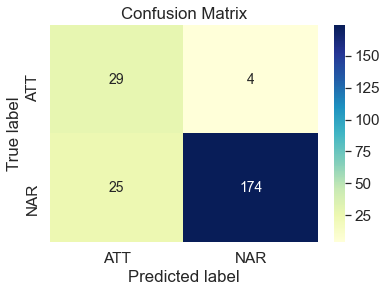

NB, Count Vectors: 
Accuracy on training data 96.44 %
Accuracy on testing data 87.5 %
              precision    recall  f1-score   support

           0       0.54      0.88      0.67        33
           1       0.98      0.87      0.92       199

    accuracy                           0.88       232
   macro avg       0.76      0.88      0.79       232
weighted avg       0.91      0.88      0.89       232

**************************************** End of first model ****************************************


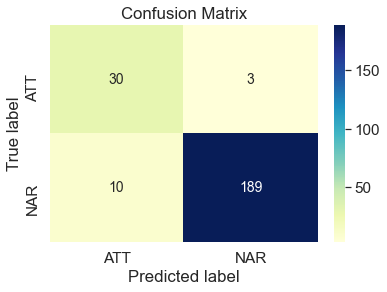

NB, WordLevel TF-IDF: 
Accuracy on training data 98.6 %
Accuracy on testing data 94.39999999999999 %
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        33
           1       0.98      0.95      0.97       199

    accuracy                           0.94       232
   macro avg       0.87      0.93      0.89       232
weighted avg       0.95      0.94      0.95       232

**************************************** End of first model ****************************************


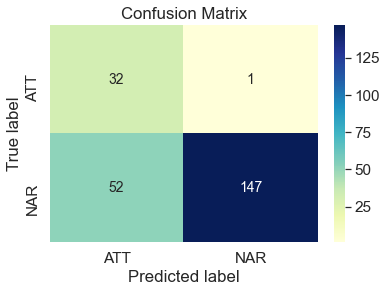

NB, N-Gram Vectors: 
Accuracy on training data 92.67999999999999 %
Accuracy on testing data 77.16 %
              precision    recall  f1-score   support

           0       0.38      0.97      0.55        33
           1       0.99      0.74      0.85       199

    accuracy                           0.77       232
   macro avg       0.69      0.85      0.70       232
weighted avg       0.91      0.77      0.80       232

**************************************** End of first model ****************************************


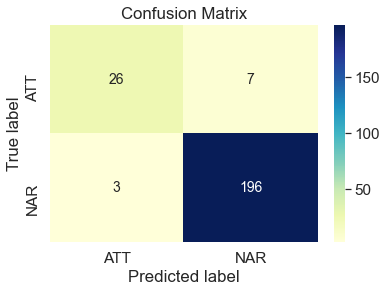

NB, CharLevel Vectors: 
Accuracy on training data 94.97 %
Accuracy on testing data 95.69 %
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.97      0.98      0.98       199

    accuracy                           0.96       232
   macro avg       0.93      0.89      0.91       232
weighted avg       0.96      0.96      0.96       232

**************************************** End of first model ****************************************


In [145]:
# Naive Bayes on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y_count, xvalid_count,"NB_CV.sav")
#confusion_matrix = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,"NB_CV.sav")
print("NB, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y_tfidf, xvalid_tfidf,"NB_WL_Tfidf.sav")
print("NB, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y_tfidf_ngram, xvalid_tfidf_ngram,"NB_NL_Tfidf.sav")
print("NB, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y_ngram_chars, xvalid_tfidf_ngram_chars,"NB_CL_Tfidf.sav")
print("NB, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


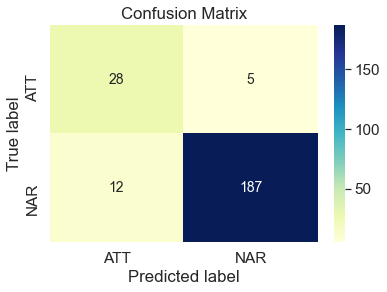

LR, Count Vectors: 
Accuracy on training data 98.41 %
Accuracy on testing data 92.67 %
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        33
           1       0.97      0.94      0.96       199

    accuracy                           0.93       232
   macro avg       0.84      0.89      0.86       232
weighted avg       0.93      0.93      0.93       232

**************************************** End of first model ****************************************


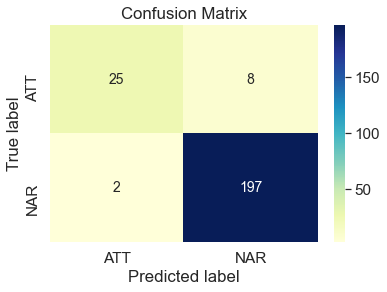

LR, WordLevel TF-IDF: 
Accuracy on training data 99.3 %
Accuracy on testing data 95.69 %
              precision    recall  f1-score   support

           0       0.93      0.76      0.83        33
           1       0.96      0.99      0.98       199

    accuracy                           0.96       232
   macro avg       0.94      0.87      0.90       232
weighted avg       0.96      0.96      0.96       232

**************************************** End of first model ****************************************


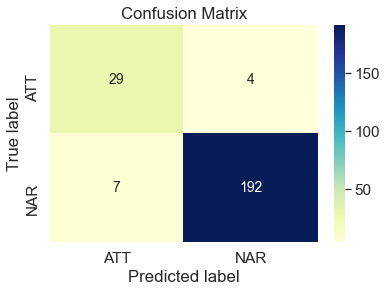

LR, N-Gram Vectors: 
Accuracy on training data 92.75 %
Accuracy on testing data 95.26 %
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.98      0.96      0.97       199

    accuracy                           0.95       232
   macro avg       0.89      0.92      0.91       232
weighted avg       0.95      0.95      0.95       232

**************************************** End of first model ****************************************


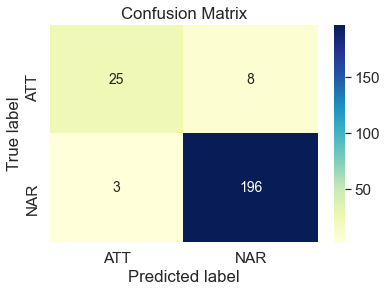

LR, CharLevel Vectors: 
Accuracy on training data 98.66 %
Accuracy on testing data 95.26 %
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.96      0.98      0.97       199

    accuracy                           0.95       232
   macro avg       0.93      0.87      0.90       232
weighted avg       0.95      0.95      0.95       232

**************************************** End of first model ****************************************


In [146]:
# Linear Classifier on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_count, train_y_count, xvalid_count, "LG_CV.sav")
print("LR, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y_tfidf, xvalid_tfidf, "LG_WL_Tfidf.sav")
print("LR, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y_tfidf_ngram, xvalid_tfidf_ngram, "LG_NL_Tfidf.sav")
print("LR, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y_ngram_chars, xvalid_tfidf_ngram_chars,"LG_CL_Tfidf.sav")
print("LR, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


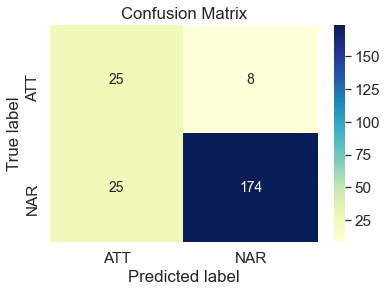

SVM, N-Gram Vectors:
Accuracy on training data 85.78 %
Accuracy on testing data 95.738 %
              precision    recall  f1-score   support

           0       0.50      0.76      0.60        33
           1       0.96      0.87      0.91       199

    accuracy                           0.86       232
   macro avg       0.73      0.82      0.76       232
weighted avg       0.89      0.86      0.87       232

**************************************** End of first model ****************************************


In [147]:
# SVM on Ngram Level TF IDF Vectors
accuracy_test,accuracy_train,confusion_matrix,classification__ = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y_tfidf_ngram, xvalid_tfidf_ngram, "SVM_NL_Tfidf.sav")
print("SVM, N-Gram Vectors:")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,5)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


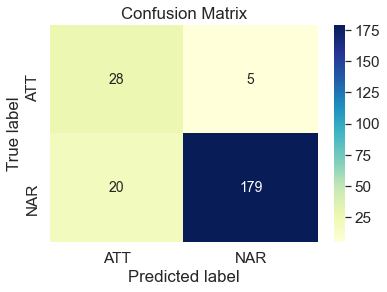

RF, Count Vectors: 
Accuracy on training data 99.42699999999999 %
Accuracy on testing data 89.22 %
              precision    recall  f1-score   support

           0       0.58      0.85      0.69        33
           1       0.97      0.90      0.93       199

    accuracy                           0.89       232
   macro avg       0.78      0.87      0.81       232
weighted avg       0.92      0.89      0.90       232

**************************************** End of first model ****************************************


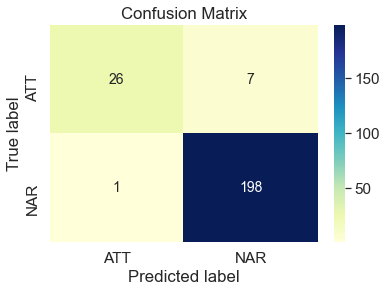

RF, WordLevel TF-IDF: 
Accuracy on training data 99.873 %
Accuracy on testing data 96.55 %
              precision    recall  f1-score   support

           0       0.96      0.79      0.87        33
           1       0.97      0.99      0.98       199

    accuracy                           0.97       232
   macro avg       0.96      0.89      0.92       232
weighted avg       0.97      0.97      0.96       232

**************************************** End of first model ****************************************


In [148]:
# RF on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y_count, xvalid_count,"RF_CV.sav")
print("RF, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# RF on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y_tfidf, xvalid_tfidf, "RF_WL_Tfidf.sav")
print("RF, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


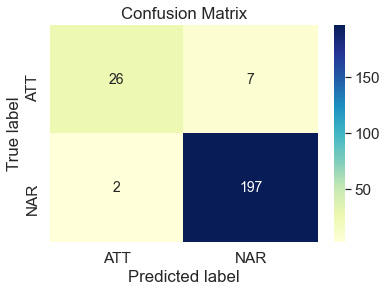

Xgb, Count Vectors: 
Accuracy on training data 99.36 %
Accuracy on testing data 96.12 %
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.97      0.99      0.98       199

    accuracy                           0.96       232
   macro avg       0.95      0.89      0.92       232
weighted avg       0.96      0.96      0.96       232

**************************************** End of first model ****************************************


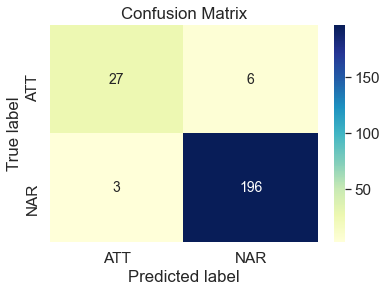

Xgb, WordLevel TF-IDF: 
Accuracy on training data 99.55000000000001 %
Accuracy on testing data 96.12 %
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.97      0.98      0.98       199

    accuracy                           0.96       232
   macro avg       0.94      0.90      0.92       232
weighted avg       0.96      0.96      0.96       232

**************************************** End of first model ****************************************


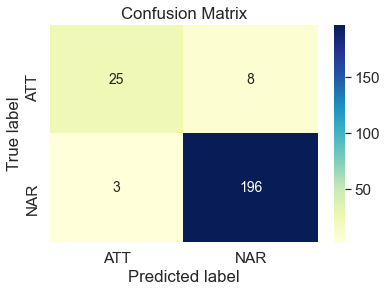

Xgb, CharLevel Vectors: 
Accuracy on training data 99.81 %
Accuracy on testing data 95.26 %
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.96      0.98      0.97       199

    accuracy                           0.95       232
   macro avg       0.93      0.87      0.90       232
weighted avg       0.95      0.95      0.95       232

**************************************** End of first model ****************************************


In [149]:
# Extereme Gradient Boosting on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y_count, xvalid_count.tocsc(),"XG_CV.sav")
print("Xgb, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y_tfidf, xvalid_tfidf.tocsc(),"XG_WL_Tfidf.sav")
print("Xgb, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y_ngram_chars, xvalid_tfidf_ngram_chars.tocsc(),"XG_CL_Tfidf.sav")
print("Xgb, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Part-11 | CLAIMS-REIMBURSMENTS Vs All

In [48]:
inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE = pandas.concat([inbox_CLAIMS_REIMBURSEMENTS,inbox_CLAIMS_REIMBURSEMENTS_RE],axis=0)

inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE = inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE.sample(frac=1).reset_index(drop=True)
inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE.isna().sum()
inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE = inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE.replace(['NAR'],'CLM')
inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE

,email,category
0,"Hi Team, Pls find attached reimbursement sheet...",CLM
1,"Hello Team, Please find attached invoice and R...",CLM
2,"Hi Team, Please find below the details and the...",CLM
3,"Hi Sri,\nPlease note, this needs to be part of...",CLM
4,Please process. Approved by Prabhash\n,CLM
...,...,...
155,"Hi Ann, PFA reimbursement sheet and PFB screen...",CLM
156,"Hi Team, Pls find attached reimbursement sheet...",CLM
157,"Hi Sri, This is the first bill i am submitting...",CLM
158,"Hi, Requesting reimbursement against the below...",CLM


In [49]:
trainDF = pandas.concat([inbox_AHAM,
                         inbox_ATTENDANCE_FIRST_RE,
                         inbox_AUS_VISA ,inbox_CENTOR ,
                         inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE,
                         inbox_DOCUMENTS_LETTERS ,
                         inbox_EMPLOYEE_DATA ,inbox_EMPLOYEE_DATA_RE,
                         inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS ,
                         inbox_RECRUITMENT ,inbox_RECRUITMENT_RE,
inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ],axis=0)

In [50]:
# # First time mail only | excluding recruitmnet folder as it has more number of mails
# trainDF = pandas.concat([inbox_AHAM,inbox_ATTENDANCE,inbox_AUS_VISA ,inbox_CENTOR ,inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE ,inbox_DOCUMENTS_LETTERS ,
# inbox_EMPLOYEE_DATA ,inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
# inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS,
# inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ],axis=0)

In [51]:
trainDF = trainDF.sample(frac=1).reset_index(drop=True)

In [52]:
trainDF = trainDF.replace(['RTT',"ATT"],'NAR')

In [53]:
trainDF.tail(5)

,email,category
1169,"\nHi Chinmay,\nAs discussed earlier I have con...",NAR
1170,"Hi,\nPlease find information below.\nKind",NAR
1171,"Hi Sandeep,\nI need to check record rules for ...",NAR
1172,"Hi Team, I have completed my salesforce certif...",CLM
1173,"Hi Team,\nPlease see the details below\nLeave ...",NAR


In [54]:
trainDF["category"].value_counts()

NAR    1014
CLM     160
Name: category, dtype: int64

In [55]:
trainDF.isna().sum()

email       15
category     0
dtype: int64

In [56]:
trainDF.dropna(inplace=True)

In [57]:
trainDF.isna().sum()

email       0
category    0
dtype: int64

In [58]:
bad_chars = ['\n','\t','\r',';', ':', '!', "*","{{}}","<>","/","//","-.",'-:',".,",",.","--","#",">","<","&","-",",",".",
             "_","@","=","^","$","!","+","?"]

In [59]:
def text_process(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
#    text = sb.clean(text)
#     text = re.sub(r"{{NAME}}", "", text)
#     text = re.sub(r"{{EMAIL}}", "", text)
#     text = re.sub(r"<mailto>", "", text)
#     text = re.sub(r"<{{URL}}>", "", text)
#     text = re.sub(r"{{URL+EMAIL}}", "", text)
#     text = re.sub(r"{{URLNAMENAME}}", "", text)
#     text = re.sub(r"<>", "", text)
#     text = re.sub(r"{{}}", "", text)
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub("\\W"," ",text) # remove special chars
#    text = re.sub('https?://\S+|www\.\S+', '', text)
#    text = re.sub('<.*?>+', '', text)
#    text = re.sub('\w*\d\w*', '', text)
    text = ''.join(k for k in text if not k in bad_chars)
    text = [word for word in text.split() if word not in stopwords.words("english")]
    text = " ".join(text)

    return text

In [60]:
trainDF["email"] = trainDF["email"].apply(text_process)
trainDF.reset_index(inplace = True,drop = True)

In [61]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['email'], trainDF['category'],test_size=0.30)#
#X_train, X_test, y_train, y_test 

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [62]:
print(train_x.shape)
print(valid_x.shape)
print(train_y.shape)
print(valid_y.shape)

(811,)
(348,)
(811,)
(348,)


In [63]:
valid_y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [64]:
checking=encoder.inverse_transform(valid_y)
checking

array(['NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'CLM',
       'NAR', 'NAR', 'NAR', 'CLM', 'NAR', 'NAR', 'CLM', 'CLM', 'NAR',
       'CLM', 'NAR', 'NAR', 'NAR', 'CLM', 'NAR', 'NAR', 'NAR', 'NAR',
       'CLM', 'NAR', 'CLM', 'CLM', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'CLM', 'NAR', 'NAR', 'NAR', 'CLM', 'NAR',
       'NAR', 'NAR', 'NAR', 'CLM', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'CLM', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'CLM', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'CLM', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'CLM', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'CLM', 'NAR', 'NAR',
       'NAR', 'NAR', 'CLM', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'CLM', 'NAR',

# CLM-0 | NAR -1

In [65]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['email'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [66]:
print(xtrain_count.shape)
print(xvalid_count.shape)

(811, 5183)
(348, 5183)


# Up Sampling for Claim Data

In [67]:
# print("Before OverSampling, counts of label '0': {}".format(sum(train_y == 0)))
# print("Before OverSampling, counts of label '1': {} \n".format(sum(train_y == 1)))
# # #print("Before OverSampling, counts of label '2': {} \n".format(sum(train_y == 2)))
# # #print("Before OverSampling, counts of label '3': {} \n".format(sum(train_y == 3)))
# # #print("Before OverSampling, counts of label '4': {} \n".format(sum(train_y == 4)))



# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 2)
# xtrain_count, train_y_count = sm.fit_resample(xtrain_count, train_y)
  
# # # # print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# # # # print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
# print("After OverSampling, counts of label '0': {}".format(sum(train_y_count == 0)))
# print("After OverSampling, counts of label '1': {}".format(sum(train_y_count == 1)))
# # # print("After OverSampling, counts of label '2': {}".format(sum(train_y == 2)))
# # # print("After OverSampling, counts of label '3': {}".format(sum(train_y == 3)))
# # # print("After OverSampling, counts of label '4': {}".format(sum(train_y == 4)))

In [68]:
print("Before OverSampling, counts of label '0': {}".format(sum(train_y == 0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(train_y == 1)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
xtrain_count, train_y_count = sm.fit_resample(xtrain_count, train_y)
print("After OverSampling, counts of label '0': {}".format(sum(train_y_count == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(train_y_count == 1)))

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=4800)
tfidf_vect.fit(trainDF['email'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)
sm = SMOTE(random_state = 2)
xtrain_tfidf, train_y_tfidf = sm.fit_resample(xtrain_tfidf, train_y)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=4800)
tfidf_vect_ngram.fit(trainDF['email'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)
sm = SMOTE(random_state = 2)
xtrain_tfidf_ngram, train_y_tfidf_ngram = sm.fit_resample(xtrain_tfidf_ngram, train_y)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=4800)
tfidf_vect_ngram_chars.fit(trainDF['email'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 
sm = SMOTE(random_state = 2)
xtrain_tfidf_ngram_chars, train_y_ngram_chars = sm.fit_resample(xtrain_tfidf_ngram_chars, train_y)

Before OverSampling, counts of label '0': 107
Before OverSampling, counts of label '1': 704 

After OverSampling, counts of label '0': 704
After OverSampling, counts of label '1': 704


C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [69]:
count_vect_trans = count_vect.fit(trainDF['email'])
pickle.dump(count_vect_trans, open('ml_model_pkl/part11_trans_clm_up/{}'.format("count_vect_trans.sav"), 'wb'))

wl_tfidf_trans = tfidf_vect.fit(trainDF['email'])
pickle.dump(wl_tfidf_trans, open('ml_model_pkl/part11_trans_clm_up/{}'.format("wl_tfidf_trans.sav"), 'wb'))

ngl_tfidf_trans = tfidf_vect_ngram.fit(trainDF['email'])
pickle.dump(ngl_tfidf_trans, open('ml_model_pkl/part11_trans_clm_up/{}'.format("ngl_tfidf_trans.sav"), 'wb'))
    
cl_tfidf_trans = tfidf_vect_ngram_chars.fit(trainDF['email'])
pickle.dump(cl_tfidf_trans, open('ml_model_pkl/part11_trans_clm_up/{}'.format("cl_tfidf_trans.sav"), 'wb'))


C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [70]:
trainDF['char_count'] = trainDF['email'].apply(len)
trainDF['word_count'] = trainDF['email'].apply(lambda x: len(x.split()))
trainDF['word_density'] = trainDF['char_count'] / (trainDF['word_count']+1)
trainDF['punctuation_count'] = trainDF['email'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
trainDF['title_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
trainDF['upper_case_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [71]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

trainDF['noun_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'noun'))
trainDF['verb_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'verb'))
trainDF['adj_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adj'))
trainDF['adv_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adv'))
trainDF['pron_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'pron'))

In [72]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [73]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,model_name, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    pickle.dump(classifier, open('ml_model_pkl/part11_model_clm_up/{}'.format(model_name), 'wb'))
    
    # predict the labels on validation dataset
    predictions_train = classifier.predict(feature_vector_train)
    predictions_test = classifier.predict(feature_vector_valid)
    
#     for i,j in zip(valid_y,predictions_test):
#         if i == j:
#             print("Equal",i,j)
#         else:
#             print("Not Equal",i,j)
    
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(label,predictions_train),metrics.accuracy_score(valid_y,predictions_test),plot_confussion_matrix(valid_y,predictions_test),classification_report(valid_y, predictions_test)

In [74]:
# Create the confussion matrix
def plot_confussion_matrix(valid_y,predictions):
    ''' Plot the confussion matrix for the target labels and predictions '''
    # CLM -0 | NAR -1
    X_labels = ["CLM","NAR"] #0|1
    Y_labels = ["CLM","NAR"]
    cm = metrics.confusion_matrix(valid_y,predictions)
    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm,cmap="YlGnBu",annot=True,fmt='.0f',annot_kws={"size": 14},xticklabels=X_labels,yticklabels=Y_labels)# font size ,,xticklabels=X_labels,xticklabels=X_labels
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

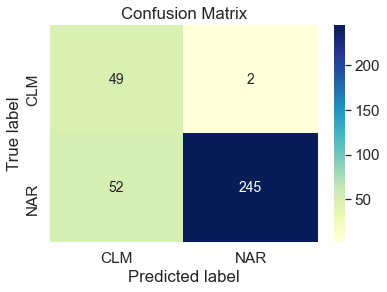

NB, Count Vectors: 
Accuracy on training data 95.30999999999999 %
Accuracy on testing data 84.48 %
              precision    recall  f1-score   support

           0       0.49      0.96      0.64        51
           1       0.99      0.82      0.90       297

    accuracy                           0.84       348
   macro avg       0.74      0.89      0.77       348
weighted avg       0.92      0.84      0.86       348

**************************************** End of first model ****************************************


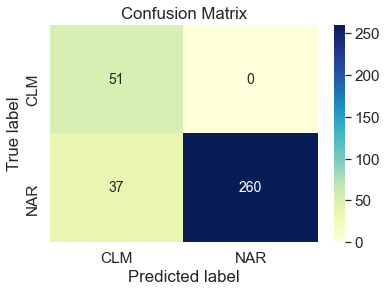

NB, WordLevel TF-IDF: 
Accuracy on training data 97.59 %
Accuracy on testing data 89.37 %
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        51
           1       1.00      0.88      0.93       297

    accuracy                           0.89       348
   macro avg       0.79      0.94      0.83       348
weighted avg       0.94      0.89      0.90       348

**************************************** End of first model ****************************************


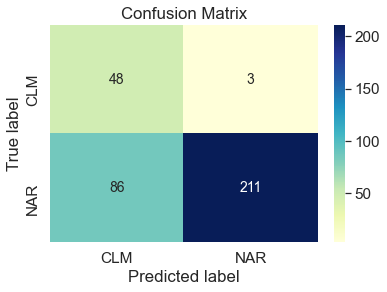

NB, N-Gram Vectors: 
Accuracy on training data 91.69 %
Accuracy on testing data 74.42999999999999 %
              precision    recall  f1-score   support

           0       0.36      0.94      0.52        51
           1       0.99      0.71      0.83       297

    accuracy                           0.74       348
   macro avg       0.67      0.83      0.67       348
weighted avg       0.89      0.74      0.78       348

**************************************** End of first model ****************************************


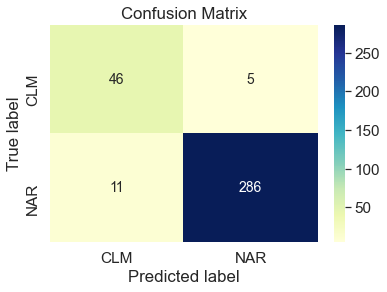

NB, CharLevel Vectors: 
Accuracy on training data 97.23 %
Accuracy on testing data 95.39999999999999 %
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        51
           1       0.98      0.96      0.97       297

    accuracy                           0.95       348
   macro avg       0.89      0.93      0.91       348
weighted avg       0.96      0.95      0.96       348

**************************************** End of first model ****************************************


In [80]:
# Naive Bayes on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y_count, xvalid_count,"NB_CV.sav")
#confusion_matrix = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,"NB_CV.sav")
print("NB, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y_tfidf, xvalid_tfidf,"NB_WL_Tfidf.sav")
print("NB, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y_tfidf_ngram, xvalid_tfidf_ngram,"NB_NL_Tfidf.sav")
print("NB, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y_ngram_chars, xvalid_tfidf_ngram_chars,"NB_CL_Tfidf.sav")
print("NB, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


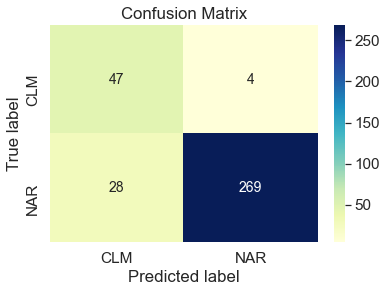

LR, Count Vectors: 
Accuracy on training data 98.44000000000001 %
Accuracy on testing data 90.8 %
              precision    recall  f1-score   support

           0       0.63      0.92      0.75        51
           1       0.99      0.91      0.94       297

    accuracy                           0.91       348
   macro avg       0.81      0.91      0.84       348
weighted avg       0.93      0.91      0.91       348

**************************************** End of first model ****************************************


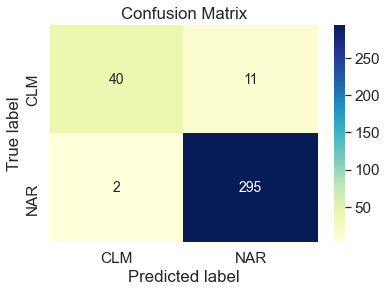

LR, WordLevel TF-IDF: 
Accuracy on training data 99.64 %
Accuracy on testing data 96.26 %
              precision    recall  f1-score   support

           0       0.95      0.78      0.86        51
           1       0.96      0.99      0.98       297

    accuracy                           0.96       348
   macro avg       0.96      0.89      0.92       348
weighted avg       0.96      0.96      0.96       348

**************************************** End of first model ****************************************


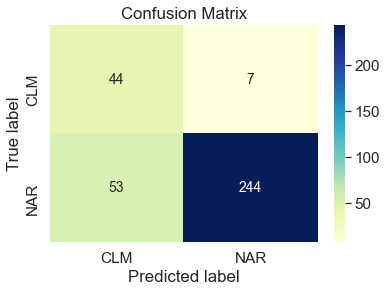

LR, N-Gram Vectors: 
Accuracy on training data 94.39 %
Accuracy on testing data 82.76 %
              precision    recall  f1-score   support

           0       0.45      0.86      0.59        51
           1       0.97      0.82      0.89       297

    accuracy                           0.83       348
   macro avg       0.71      0.84      0.74       348
weighted avg       0.90      0.83      0.85       348

**************************************** End of first model ****************************************


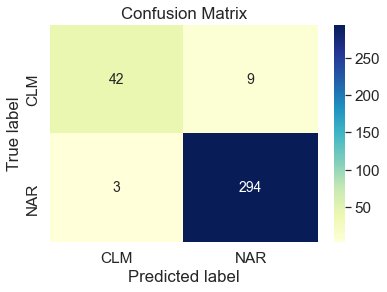

LR, CharLevel Vectors: 
Accuracy on training data 99.15 %
Accuracy on testing data 96.55 %
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        51
           1       0.97      0.99      0.98       297

    accuracy                           0.97       348
   macro avg       0.95      0.91      0.93       348
weighted avg       0.96      0.97      0.96       348

**************************************** End of first model ****************************************


In [81]:
# Linear Classifier on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_count, train_y_count, xvalid_count, "LG_CV.sav")
print("LR, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y_tfidf, xvalid_tfidf, "LG_WL_Tfidf.sav")
print("LR, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y_tfidf_ngram, xvalid_tfidf_ngram, "LG_NL_Tfidf.sav")
print("LR, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y_ngram_chars, xvalid_tfidf_ngram_chars,"LG_CL_Tfidf.sav")
print("LR, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


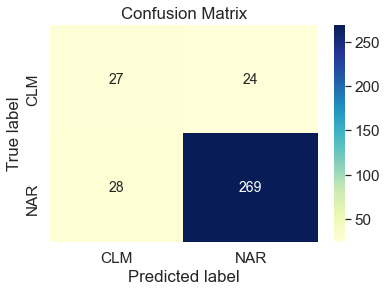

SVM, N-Gram Vectors:
Accuracy on training data 85.06 %
Accuracy on testing data 95.597 %
              precision    recall  f1-score   support

           0       0.49      0.53      0.51        51
           1       0.92      0.91      0.91       297

    accuracy                           0.85       348
   macro avg       0.70      0.72      0.71       348
weighted avg       0.86      0.85      0.85       348

**************************************** End of first model ****************************************


In [82]:
# SVM on Ngram Level TF IDF Vectors
accuracy_test,accuracy_train,confusion_matrix,classification__ = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y_tfidf_ngram, xvalid_tfidf_ngram, "SVM_NL_Tfidf.sav")
print("SVM, N-Gram Vectors:")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,5)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


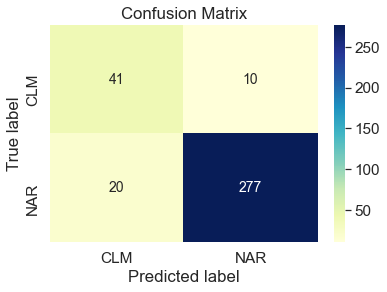

RF, Count Vectors: 
Accuracy on training data 99.645 %
Accuracy on testing data 91.38 %
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        51
           1       0.97      0.93      0.95       297

    accuracy                           0.91       348
   macro avg       0.82      0.87      0.84       348
weighted avg       0.92      0.91      0.92       348

**************************************** End of first model ****************************************


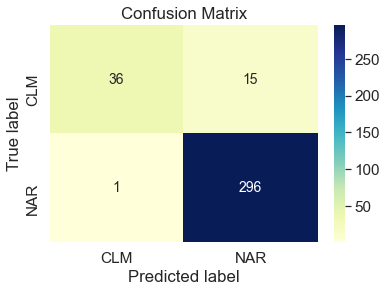

RF, WordLevel TF-IDF: 
Accuracy on training data 99.929 %
Accuracy on testing data 95.39999999999999 %
              precision    recall  f1-score   support

           0       0.97      0.71      0.82        51
           1       0.95      1.00      0.97       297

    accuracy                           0.95       348
   macro avg       0.96      0.85      0.90       348
weighted avg       0.95      0.95      0.95       348

**************************************** End of first model ****************************************


In [83]:
# RF on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y_count, xvalid_count,"RF_CV.sav")
print("RF, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# RF on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y_tfidf, xvalid_tfidf, "RF_WL_Tfidf.sav")
print("RF, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


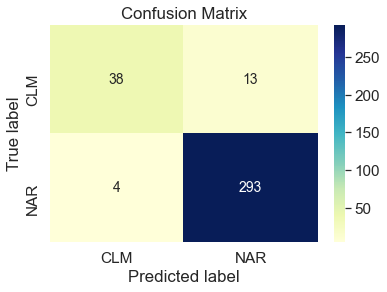

Xgb, Count Vectors: 
Accuracy on training data 99.15 %
Accuracy on testing data 95.11 %
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        51
           1       0.96      0.99      0.97       297

    accuracy                           0.95       348
   macro avg       0.93      0.87      0.89       348
weighted avg       0.95      0.95      0.95       348

**************************************** End of first model ****************************************


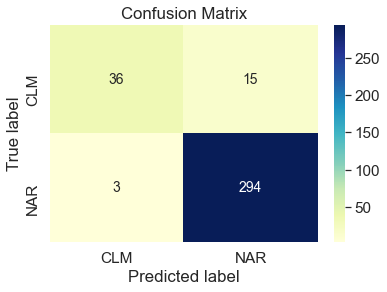

Xgb, WordLevel TF-IDF: 
Accuracy on training data 99.42999999999999 %
Accuracy on testing data 94.83 %
              precision    recall  f1-score   support

           0       0.92      0.71      0.80        51
           1       0.95      0.99      0.97       297

    accuracy                           0.95       348
   macro avg       0.94      0.85      0.89       348
weighted avg       0.95      0.95      0.95       348

**************************************** End of first model ****************************************


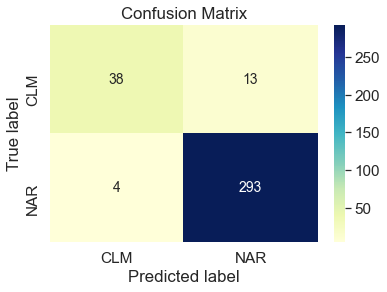

Xgb, CharLevel Vectors: 
Accuracy on training data 99.92999999999999 %
Accuracy on testing data 95.11 %
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        51
           1       0.96      0.99      0.97       297

    accuracy                           0.95       348
   macro avg       0.93      0.87      0.89       348
weighted avg       0.95      0.95      0.95       348

**************************************** End of first model ****************************************


In [84]:
# Extereme Gradient Boosting on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y_count, xvalid_count.tocsc(),"XG_CV.sav")
print("Xgb, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y_tfidf, xvalid_tfidf.tocsc(),"XG_WL_Tfidf.sav")
print("Xgb, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y_ngram_chars, xvalid_tfidf_ngram_chars.tocsc(),"XG_CL_Tfidf.sav")
print("Xgb, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Part-12 EMPLOYEE DATA Vs All

In [85]:
inbox_EMPLOYEE_DATA_FIRST_RE = pandas.concat([inbox_EMPLOYEE_DATA,inbox_EMPLOYEE_DATA_RE],axis=0)

inbox_EMPLOYEE_DATA_FIRST_RE = inbox_EMPLOYEE_DATA_FIRST_RE.sample(frac=1).reset_index(drop=True)
inbox_EMPLOYEE_DATA_FIRST_RE.isna().sum()
inbox_EMPLOYEE_DATA_FIRST_RE = inbox_EMPLOYEE_DATA_FIRST_RE.replace(['NAR'],'EMP')
inbox_EMPLOYEE_DATA_FIRST_RE

,email,category
0,"Hi Reza,\nRequest you to share below details f...",EMP
1,"\nHi Srividya,\nPlease find the attached docum...",EMP
2,"\nDear Ma'am,\nPlease find the attachment of m...",EMP
3,"\nHello, This is Akhil\nThe below-attached doc...",EMP
4,I am travellin and wont be avilable on 15'th ...,EMP
...,...,...
93,CAUTION: This email originated from outside of...,EMP
94,"\nOn Wed, Apr 21, 2021 at 4:20 PM Divya V <div...",EMP
95,"\nHello Aishwarya,\nPFA resignation mail fro...",EMP
96,"\nhi Ann,\nPls find the below attached details...",EMP


In [86]:
trainDF = pandas.concat([inbox_AHAM,
                         inbox_ATTENDANCE_FIRST_RE,
                         inbox_AUS_VISA ,inbox_CENTOR ,
                         inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE,
                         inbox_DOCUMENTS_LETTERS ,
                         inbox_EMPLOYEE_DATA_FIRST_RE,
                         inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS ,
                         inbox_RECRUITMENT ,inbox_RECRUITMENT_RE,
inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ],axis=0)

In [87]:
# # First time mail only | excluding recruitmnet folder as it has more number of mails
# trainDF = pandas.concat([inbox_AHAM,inbox_ATTENDANCE,inbox_AUS_VISA ,inbox_CENTOR ,inbox_CLAIMS_REIMBURSEMENTS ,inbox_DOCUMENTS_LETTERS ,
# inbox_EMPLOYEE_DATA_FIRST_RE ,inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
# inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS,
# inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ],axis=0)

In [88]:
trainDF = trainDF.sample(frac=1).reset_index(drop=True)

In [89]:
trainDF = trainDF.replace(['RTT',"ATT","CLM"],'NAR')

In [90]:
trainDF["category"].value_counts()

NAR    1076
EMP      98
Name: category, dtype: int64

In [91]:
trainDF.isna().sum()

email       15
category     0
dtype: int64

In [92]:
trainDF.dropna(inplace=True)

In [93]:
trainDF.isna().sum()

email       0
category    0
dtype: int64

In [94]:
bad_chars = ['\n','\t','\r',';', ':', '!', "*","{{}}","<>","/","//","-.",'-:',".,",",.","--","#",">","<","&","-",",",".",
             "_","@","=","^","$","!","+","?"]

In [95]:
def text_process(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
#    text = sb.clean(text)
#     text = re.sub(r"{{NAME}}", "", text)
#     text = re.sub(r"{{EMAIL}}", "", text)
#     text = re.sub(r"<mailto>", "", text)
#     text = re.sub(r"<{{URL}}>", "", text)
#     text = re.sub(r"{{URL+EMAIL}}", "", text)
#     text = re.sub(r"{{URLNAMENAME}}", "", text)
#     text = re.sub(r"<>", "", text)
#     text = re.sub(r"{{}}", "", text)
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub("\\W"," ",text) # remove special chars
#    text = re.sub('https?://\S+|www\.\S+', '', text)
#    text = re.sub('<.*?>+', '', text)
#    text = re.sub('\w*\d\w*', '', text)
    text = ''.join(k for k in text if not k in bad_chars)
    text = [word for word in text.split() if word not in stopwords.words("english")]
    text = " ".join(text)

    return text

In [96]:
trainDF["email"] = trainDF["email"].apply(text_process)
trainDF.reset_index(inplace = True,drop = True)

In [97]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['email'], trainDF['category'],test_size=0.25)#
#X_train, X_test, y_train, y_test 

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [98]:
print(train_x.shape)
print(valid_x.shape)
print(train_y.shape)
print(valid_y.shape)


(869,)
(290,)
(869,)
(290,)


In [99]:
valid_y

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [100]:
checking=encoder.inverse_transform(valid_y)
checking

array(['EMP', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'EMP', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'EMP', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'EMP',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'EMP', 'NAR',
       'EMP', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'EMP', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'EMP', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'EMP', 'NAR', 'NAR', 'NAR',
       'NAR', 'EMP', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'EMP', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR',

# EMP-0 | NAR-1

In [101]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['email'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [102]:
print(xtrain_count.shape)
print(xvalid_count.shape)

(869, 5183)
(290, 5183)


# Up sampling for Empployee Data

In [103]:
# print("Before OverSampling, counts of label '0': {}".format(sum(train_y == 0)))
# print("Before OverSampling, counts of label '1': {} \n".format(sum(train_y == 1)))
# # #print("Before OverSampling, counts of label '2': {} \n".format(sum(train_y == 2)))
# # #print("Before OverSampling, counts of label '3': {} \n".format(sum(train_y == 3)))
# # #print("Before OverSampling, counts of label '4': {} \n".format(sum(train_y == 4)))



# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 2)
# xtrain_count, train_y_count = sm.fit_resample(xtrain_count, train_y)
  
# # # # print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# # # # print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
# print("After OverSampling, counts of label '0': {}".format(sum(train_y_count == 0)))
# print("After OverSampling, counts of label '1': {}".format(sum(train_y_count == 1)))
# # # print("After OverSampling, counts of label '2': {}".format(sum(train_y == 2)))
# # # print("After OverSampling, counts of label '3': {}".format(sum(train_y == 3)))
# # # print("After OverSampling, counts of label '4': {}".format(sum(train_y == 4)))

In [104]:
print("Before OverSampling, counts of label '0': {}".format(sum(train_y == 0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(train_y == 1)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
xtrain_count, train_y_count = sm.fit_resample(xtrain_count, train_y)
print("After OverSampling, counts of label '0': {}".format(sum(train_y_count == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(train_y_count == 1)))

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=4800)
tfidf_vect.fit(trainDF['email'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)
sm = SMOTE(random_state = 2)
xtrain_tfidf, train_y_tfidf = sm.fit_resample(xtrain_tfidf, train_y)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=4800)
tfidf_vect_ngram.fit(trainDF['email'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)
sm = SMOTE(random_state = 2)
xtrain_tfidf_ngram, train_y_tfidf_ngram = sm.fit_resample(xtrain_tfidf_ngram, train_y)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=4800)
tfidf_vect_ngram_chars.fit(trainDF['email'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 
sm = SMOTE(random_state = 2)
xtrain_tfidf_ngram_chars, train_y_ngram_chars = sm.fit_resample(xtrain_tfidf_ngram_chars, train_y)

Before OverSampling, counts of label '0': 74
Before OverSampling, counts of label '1': 795 

After OverSampling, counts of label '0': 795
After OverSampling, counts of label '1': 795


C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [105]:
count_vect_trans = count_vect.fit(trainDF['email'])
pickle.dump(count_vect_trans, open('ml_model_pkl/part12_trans_emp_up/{}'.format("count_vect_trans.sav"), 'wb'))

wl_tfidf_trans = tfidf_vect.fit(trainDF['email'])
pickle.dump(wl_tfidf_trans, open('ml_model_pkl/part12_trans_emp_up/{}'.format("wl_tfidf_trans.sav"), 'wb'))

ngl_tfidf_trans = tfidf_vect_ngram.fit(trainDF['email'])
pickle.dump(ngl_tfidf_trans, open('ml_model_pkl/part12_trans_emp_up/{}'.format("ngl_tfidf_trans.sav"), 'wb'))
    
cl_tfidf_trans = tfidf_vect_ngram_chars.fit(trainDF['email'])
pickle.dump(cl_tfidf_trans, open('ml_model_pkl/part12_trans_emp_up/{}'.format("cl_tfidf_trans.sav"), 'wb'))


C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [106]:
# count_vect_trans_ = joblib.load('ml_model_pkl/part4_trans_emp/count_vect_trans.sav')

# wl_tfidf_trans_ = joblib.load('ml_model_pkl/part4_trans_emp/wl_tfidf_trans.sav')

# ngl_tfidf_trans_ = joblib.load('ml_model_pkl/part4_trans_emp/ngl_tfidf_trans.sav')

# cl_tfidf_trans_ = joblib.load('ml_model_pkl/part4_trans_emp/cl_tfidf_trans.sav')


In [107]:
trainDF['char_count'] = trainDF['email'].apply(len)
trainDF['word_count'] = trainDF['email'].apply(lambda x: len(x.split()))
trainDF['word_density'] = trainDF['char_count'] / (trainDF['word_count']+1)
trainDF['punctuation_count'] = trainDF['email'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
trainDF['title_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
trainDF['upper_case_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [108]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

trainDF['noun_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'noun'))
trainDF['verb_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'verb'))
trainDF['adj_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adj'))
trainDF['adv_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adv'))
trainDF['pron_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'pron'))

In [109]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [110]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,model_name, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    pickle.dump(classifier, open('ml_model_pkl/part12_model_emp_up/{}'.format(model_name), 'wb'))
    
    # predict the labels on validation dataset
    predictions_train = classifier.predict(feature_vector_train)
    predictions_test = classifier.predict(feature_vector_valid)
    
#     for i,j in zip(valid_y,predictions_test):
#         if i == j:
#             print("Equal",i,j)
#         else:
#             print("Not Equal",i,j)
    
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(label,predictions_train),metrics.accuracy_score(valid_y,predictions_test),plot_confussion_matrix(valid_y,predictions_test),classification_report(valid_y, predictions_test)

In [111]:
# Create the confussion matrix
def plot_confussion_matrix(valid_y,predictions):
    ''' Plot the confussion matrix for the target labels and predictions '''
     # EMP -0 | NAR -1
    X_labels = ['EMP',"NAR"]
    Y_labels = ["EMP","NAR"]
    cm = metrics.confusion_matrix(valid_y,predictions)
    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm,cmap="YlGnBu",annot=True,fmt='.0f',annot_kws={"size": 14},xticklabels=X_labels,yticklabels=Y_labels)# font size ,
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

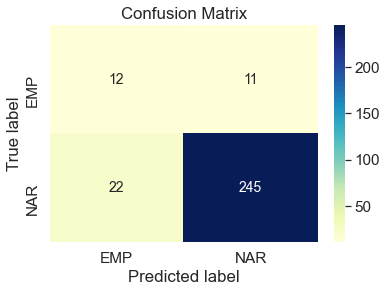

NB, Count Vectors: 
Accuracy on training data 92.7 %
Accuracy on testing data 88.62 %
              precision    recall  f1-score   support

           0       0.35      0.52      0.42        23
           1       0.96      0.92      0.94       267

    accuracy                           0.89       290
   macro avg       0.65      0.72      0.68       290
weighted avg       0.91      0.89      0.90       290

**************************************** End of first model ****************************************


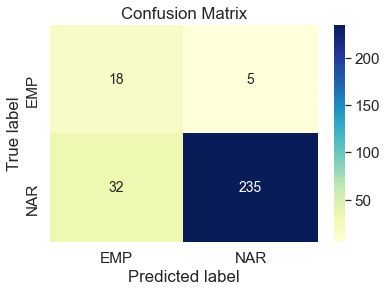

NB, WordLevel TF-IDF: 
Accuracy on training data 94.97 %
Accuracy on testing data 87.24 %
              precision    recall  f1-score   support

           0       0.36      0.78      0.49        23
           1       0.98      0.88      0.93       267

    accuracy                           0.87       290
   macro avg       0.67      0.83      0.71       290
weighted avg       0.93      0.87      0.89       290

**************************************** End of first model ****************************************


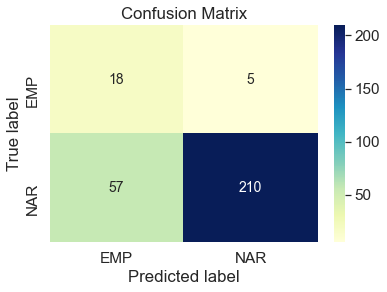

NB, N-Gram Vectors: 
Accuracy on training data 90.31 %
Accuracy on testing data 78.62 %
              precision    recall  f1-score   support

           0       0.24      0.78      0.37        23
           1       0.98      0.79      0.87       267

    accuracy                           0.79       290
   macro avg       0.61      0.78      0.62       290
weighted avg       0.92      0.79      0.83       290

**************************************** End of first model ****************************************


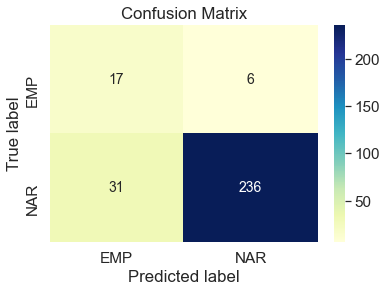

NB, CharLevel Vectors: 
Accuracy on training data 93.33 %
Accuracy on testing data 87.24 %
              precision    recall  f1-score   support

           0       0.35      0.74      0.48        23
           1       0.98      0.88      0.93       267

    accuracy                           0.87       290
   macro avg       0.66      0.81      0.70       290
weighted avg       0.93      0.87      0.89       290

**************************************** End of first model ****************************************


In [112]:
# Naive Bayes on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y_count, xvalid_count,"NB_CV.sav")
#confusion_matrix = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,"NB_CV.sav")
print("NB, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y_tfidf, xvalid_tfidf,"NB_WL_Tfidf.sav")
print("NB, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y_tfidf_ngram, xvalid_tfidf_ngram,"NB_NL_Tfidf.sav")
print("NB, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y_ngram_chars, xvalid_tfidf_ngram_chars,"NB_CL_Tfidf.sav")
print("NB, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


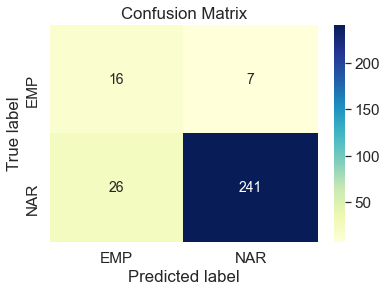

LR, Count Vectors: 
Accuracy on training data 97.36 %
Accuracy on testing data 88.62 %
              precision    recall  f1-score   support

           0       0.38      0.70      0.49        23
           1       0.97      0.90      0.94       267

    accuracy                           0.89       290
   macro avg       0.68      0.80      0.71       290
weighted avg       0.92      0.89      0.90       290

**************************************** End of first model ****************************************


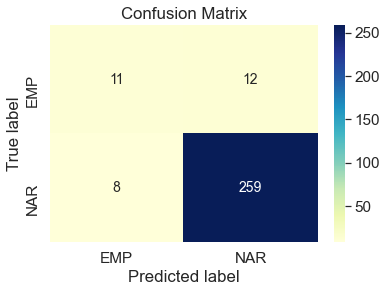

LR, WordLevel TF-IDF: 
Accuracy on training data 98.92999999999999 %
Accuracy on testing data 93.10000000000001 %
              precision    recall  f1-score   support

           0       0.58      0.48      0.52        23
           1       0.96      0.97      0.96       267

    accuracy                           0.93       290
   macro avg       0.77      0.72      0.74       290
weighted avg       0.93      0.93      0.93       290

**************************************** End of first model ****************************************


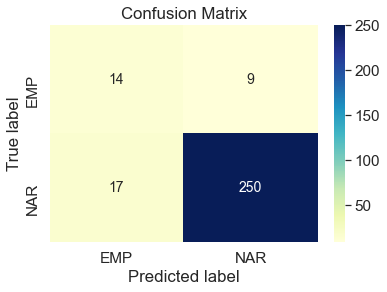

LR, N-Gram Vectors: 
Accuracy on training data 95.22 %
Accuracy on testing data 91.03 %
              precision    recall  f1-score   support

           0       0.45      0.61      0.52        23
           1       0.97      0.94      0.95       267

    accuracy                           0.91       290
   macro avg       0.71      0.77      0.73       290
weighted avg       0.92      0.91      0.92       290

**************************************** End of first model ****************************************


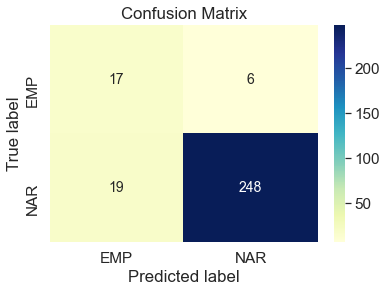

LR, CharLevel Vectors: 
Accuracy on training data 96.23 %
Accuracy on testing data 91.38 %
              precision    recall  f1-score   support

           0       0.47      0.74      0.58        23
           1       0.98      0.93      0.95       267

    accuracy                           0.91       290
   macro avg       0.72      0.83      0.76       290
weighted avg       0.94      0.91      0.92       290

**************************************** End of first model ****************************************


In [113]:
# Linear Classifier on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_count, train_y_count, xvalid_count, "LG_CV.sav")
print("LR, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y_tfidf, xvalid_tfidf, "LG_WL_Tfidf.sav")
print("LR, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y_tfidf_ngram, xvalid_tfidf_ngram, "LG_NL_Tfidf.sav")
print("LR, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y_ngram_chars, xvalid_tfidf_ngram_chars,"LG_CL_Tfidf.sav")
print("LR, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


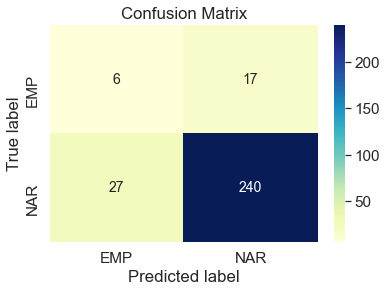

SVM, N-Gram Vectors:
Accuracy on training data 84.83000000000001 %
Accuracy on testing data 95.283 %
              precision    recall  f1-score   support

           0       0.18      0.26      0.21        23
           1       0.93      0.90      0.92       267

    accuracy                           0.85       290
   macro avg       0.56      0.58      0.57       290
weighted avg       0.87      0.85      0.86       290

**************************************** End of first model ****************************************


In [114]:
# SVM on Ngram Level TF IDF Vectors
accuracy_test,accuracy_train,confusion_matrix,classification__ = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y_tfidf_ngram, xvalid_tfidf_ngram, "SVM_NL_Tfidf.sav")
print("SVM, N-Gram Vectors:")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,5)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


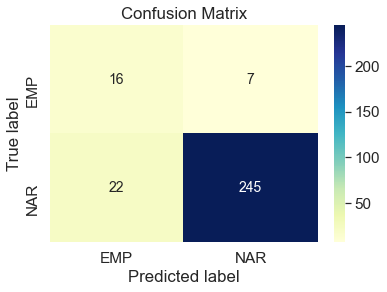

RF, Count Vectors: 
Accuracy on training data 99.30799999999999 %
Accuracy on testing data 90.0 %
              precision    recall  f1-score   support

           0       0.42      0.70      0.52        23
           1       0.97      0.92      0.94       267

    accuracy                           0.90       290
   macro avg       0.70      0.81      0.73       290
weighted avg       0.93      0.90      0.91       290

**************************************** End of first model ****************************************


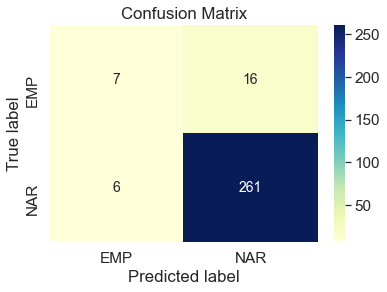

RF, WordLevel TF-IDF: 
Accuracy on training data 99.62299999999999 %
Accuracy on testing data 92.41 %
              precision    recall  f1-score   support

           0       0.54      0.30      0.39        23
           1       0.94      0.98      0.96       267

    accuracy                           0.92       290
   macro avg       0.74      0.64      0.67       290
weighted avg       0.91      0.92      0.91       290

**************************************** End of first model ****************************************


In [115]:
# RF on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y_count, xvalid_count,"RF_CV.sav")
print("RF, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# RF on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y_tfidf, xvalid_tfidf, "RF_WL_Tfidf.sav")
print("RF, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


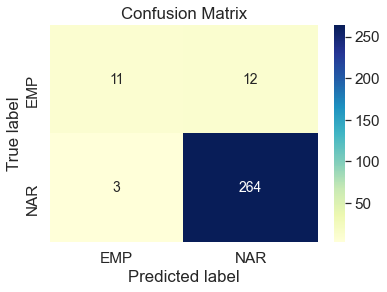

Xgb, Count Vectors: 
Accuracy on training data 99.06 %
Accuracy on testing data 94.83 %
              precision    recall  f1-score   support

           0       0.79      0.48      0.59        23
           1       0.96      0.99      0.97       267

    accuracy                           0.95       290
   macro avg       0.87      0.73      0.78       290
weighted avg       0.94      0.95      0.94       290

**************************************** End of first model ****************************************


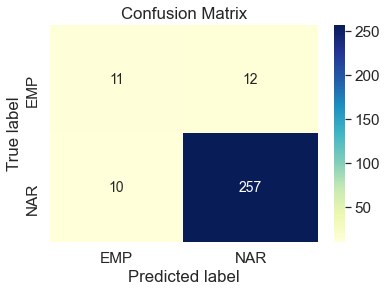

Xgb, WordLevel TF-IDF: 
Accuracy on training data 99.5 %
Accuracy on testing data 92.41 %
              precision    recall  f1-score   support

           0       0.52      0.48      0.50        23
           1       0.96      0.96      0.96       267

    accuracy                           0.92       290
   macro avg       0.74      0.72      0.73       290
weighted avg       0.92      0.92      0.92       290

**************************************** End of first model ****************************************


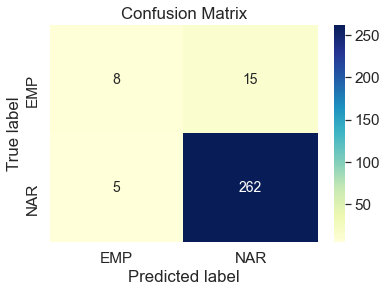

Xgb, CharLevel Vectors: 
Accuracy on training data 99.62 %
Accuracy on testing data 93.10000000000001 %
              precision    recall  f1-score   support

           0       0.62      0.35      0.44        23
           1       0.95      0.98      0.96       267

    accuracy                           0.93       290
   macro avg       0.78      0.66      0.70       290
weighted avg       0.92      0.93      0.92       290

**************************************** End of first model ****************************************


In [116]:
# Extereme Gradient Boosting on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y_count, xvalid_count.tocsc(),"XG_CV.sav")
print("Xgb, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y_tfidf, xvalid_tfidf.tocsc(),"XG_WL_Tfidf.sav")
print("Xgb, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y_ngram_chars, xvalid_tfidf_ngram_chars.tocsc(),"XG_CL_Tfidf.sav")
print("Xgb, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Stacking Classifier

In [ ]:
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import plot_confusion_matrix


m = StackingClassifier(classifiers=[xgboost.XGBClassifier(),ensemble.RandomForestClassifier()],use_probas=True,
                       meta_classifier=svm.SVC())
#,naive_bayes.MultinomialNB()

m.fit(xtrain_tfidf_ngram_chars.tocsc(), train_y)

pred_stck = m.predict(xvalid_tfidf_ngram_chars.tocsc()) #[:,1]

#preds.head()

print(metrics.accuracy_score(valid_y,pred_stck))
print(metrics.accuracy_score(train_y,m.predict(xtrain_tfidf_ngram_chars)))

metrics.confusion_matrix(valid_y,pred_stck)


# Testing

In [ ]:
model = joblib.load('ml_model_pkl/NB_CV.sav')
new_desc = ['''Action needed: Check your Atlassian payment detailsHi Manoj,We couldn't process payment for Bitbucket (centelon) due to a problem with your payment details. We're happy to try again, but we need your help.If your details look correct, please try a different payment method or alternatively contact your bank. Banks sometimes decline payments due to restrictions on international transactions.Update Payment DetailsPlease contact us with any questions, we're always happy to help.
''']
labels = ["AR","NAR"]
nb_count =  count_vect.transform(new_desc)
#nb_count =  tfidf_vect.transform(new_desc)
#nb_count =  tfidf_vect_ngram.transform(new_desc)

#nb_count =  tfidf_vect_ngram_chars.transform(new_desc)
pred = model.predict(nb_count)
print(pred, labels[pred[0]])

# TESTING

In [479]:
# Testing data from inbox folder- 35 mail classified as AR or NAR
#sample_data = pandas.read_csv(r"C:/Users/mansurya/Desktop/Email_triage/test/testing_data/testing_data_inbox_23_12.csv") #cent_inbox_28_12

# Testing data from inbox folder - All mails first time mails and forward
#sample_data = pandas.read_csv(r"C:/Users/mansurya/Desktop/Email_triage/test/cent_inbox_28_12.csv")

# Testin data from inbox folder - All reply 
#sample_data = pandas.read_csv(r"C:/Users/mansurya/Desktop/Email_triage/test/cen_inbox_ALL_RE_28_12.csv")

# Testin data from inbox/AR folder - Reply 
sample_data = pandas.read_csv(r"E:\EmailTriage\EmailTriage_C_Operatn_5-5-21\validation_data\validation_data_RTT.csv")

In [480]:
sample_data.head()

,email,category
0,"Hi Srividya, Hope you are safe and doing great...",NAR
1,"Hi Pragati,\nThanks for raising the query.\nAn...",RTT
2,Hi\nMy birth date is 29 Sep and not 29 June as...,NAR
3,"Hi Atul,\nGood Noon .\nAs per the cap of Skill...",NAR
4,"Hi Sri,\nThe amount which i claim for reimburs...",NAR


In [481]:
sample_data = sample_data.sample(frac=1).reset_index(drop= True)
sample_data.tail(16)

,email,category
29,"\nHi Sathish,\nThanks for the offer letter. Pl...",RTT
30,"Hello,\nGood Morning. And wish you Happy Diwal...",NAR
31,"\nDear Centelon,\nI would like to thank you fo...",RTT
32,"\nHi,\nThanks for the revised offer letter.\nP...",RTT
33,"\nHi Srividya,\nI can't add my Master degree c...",NAR
34,"Hi Ann, As discussed this morning, can you ple...",RTT
35,"Dear Hema, Greetings !!! Kindly find attached ...",RTT
36,"Dear Ashwin, Congratulations!! On behalf of Ce...",RTT
37,"\nHi Team,\nThanks for providing me the opport...",RTT
38,"Hello,\nYes now I can see the leaves in leave ...",NAR


In [482]:
sample_data.shape

(45, 2)

In [483]:
sample_data.isnull().sum()

email       0
category    0
dtype: int64

In [484]:
sample_data.dropna(inplace=True)

In [485]:
sample_data.shape

(45, 2)

In [486]:
sample_data["category"].value_counts()

NAR    24
RTT    21
Name: category, dtype: int64

# Testing on Naive-Bayes + Count Vectorizer

In [487]:
model = joblib.load('E:\EmailTriage\EmailTriage_C_Operatn_5-5-21\Code\ml_model_pkl\part1_model_rec/NB_CV.sav')
count_vect_trans = joblib.load('ml_model_pkl/part1_trans_rec/count_vect_trans.sav')

In [490]:
#sample_data = pd.read_csv('csv_name.csv')
#labels = ["Activation/Deactiavtion of Credit Card","Credit Card Payment Dispute",
#         "Credit card dispute", "Payment Dispute"]

labels = ["NAR","RTT"] # As per above encoding NAR is 0 and RTT is 1 | Change accordingly for all class
pr_list =[]
count = 0
count_not = 0
for i,j in zip(sample_data['category'],sample_data['email']):
    
    pred_n = model.predict(count_vect_trans.transform([j]))
    #pred_n = model.predict(tfidf_vect_ngram_chars.transform([j]))
    print(i, labels[pred_n[0]])
    pr_list.append([j, i, labels[pred_n[0]]])
    if i == labels[pred_n[0]]:
        count+=1
    else:
        #i != labels[pred_n[0]]
        count_not+=1
        #continue
print("Matching",count)
print("Not Matching",count_not)
pd.DataFrame(pr_list, columns = ['Email', 'Actual','Predicted']).to_csv(r'prediction_inbox_reply_28_12.csv')

RTT NAR
NAR RTT
NAR NAR
RTT NAR
RTT RTT
NAR NAR
NAR RTT
RTT NAR
NAR NAR
RTT NAR
NAR NAR
NAR NAR
NAR NAR
NAR NAR
RTT RTT
RTT RTT
NAR NAR
NAR NAR
RTT NAR
NAR RTT
RTT NAR
NAR NAR
RTT NAR
RTT NAR
NAR NAR
NAR NAR
NAR NAR
NAR NAR
NAR NAR
RTT RTT
NAR NAR
RTT RTT
RTT RTT
NAR NAR
RTT NAR
RTT NAR
RTT RTT
RTT NAR
NAR NAR
NAR NAR
NAR NAR
NAR NAR
RTT NAR
RTT NAR
RTT NAR
Matching 28
Not Matching 17


# Testing on Naive Bayes + Wordlevel TFidf

In [493]:
model = joblib.load('E:\EmailTriage\EmailTriage_C_Operatn_5-5-21\Code\ml_model_pkl\part1_model_rec/NB_WL_Tfidf.sav')
wl_tfidf_trans = joblib.load('ml_model_pkl/part1_trans_rec/wl_tfidf_trans.sav')
#labels = ["AR","NAR"]

#nb_count =  count_vect.transform(new_desc)
#nb_count =  tfidf_vect.transform(new_desc)
#nb_count =  tfidf_vect_ngram.transform(new_desc)

#nb_count =  tfidf_vect_ngram_chars.transform(new_desc)
#pred = model.predict(nb_count)
#print(pred, labels[pred[0]])

In [495]:
#sample_data = pd.read_csv('csv_name.csv')
#labels = ["Activation/Deactiavtion of Credit Card","Credit Card Payment Dispute",
#         "Credit card dispute", "Payment Dispute"]

labels = ["NAR","RTT"]
pr_list =[]
count = 0
count_not=0
for i,j in zip(sample_data['category'],sample_data['email']):
    
    pred_n = model.predict(wl_tfidf_trans.transform([j]))
    #pred_n = model.predict(tfidf_vect_ngram_chars.transform([j]))
    print(i, labels[pred_n[0]])
    pr_list.append([j, i, labels[pred_n[0]]])
    if i == labels[pred_n[0]]:
        count+=1
    else:
        count_not+=1
        #continue
print(count)
print(count_not)
#pd.DataFrame(pr_list, columns = ['Email', 'Actual','Predicted']).to_csv(r'C:\Users\mansurya\Desktop\Email_triage\test\prediction_output\prediction_inbox_NB_WL66_30_12.csv')

RTT RTT
NAR RTT
NAR NAR
RTT RTT
RTT RTT
NAR NAR
NAR RTT
RTT NAR
NAR NAR
RTT NAR
NAR NAR
NAR NAR
NAR NAR
NAR NAR
RTT RTT
RTT RTT
NAR NAR
NAR NAR
RTT NAR
NAR RTT
RTT NAR
NAR NAR
RTT RTT
RTT NAR
NAR NAR
NAR NAR
NAR NAR
NAR NAR
NAR NAR
RTT RTT
NAR NAR
RTT RTT
RTT RTT
NAR NAR
RTT NAR
RTT NAR
RTT RTT
RTT NAR
NAR NAR
NAR NAR
NAR NAR
NAR NAR
RTT NAR
RTT NAR
RTT RTT
32
13


# Testing on SVM Model

In [ ]:
model = joblib.load('ml_model_pkl/SVM_NL_Tfidf.sav')
labels = ["AR","NAR"]

#nb_count =  count_vect.transform(new_desc)
#nb_count =  tfidf_vect.transform(new_desc)
#nb_count =  tfidf_vect_ngram.transform(new_desc)

#nb_count =  tfidf_vect_ngram_chars.transform(new_desc)
#pred = model.predict(nb_count)
#print(pred, labels[pred[0]])

In [ ]:
#sample_data = pd.read_csv('csv_name.csv')
#labels = ["Activation/Deactiavtion of Credit Card","Credit Card Payment Dispute",
#         "Credit card dispute", "Payment Dispute"]

labels = ["AR","NAR"]
pr_list =[]
count = 0
for i,j in zip(sample_data['category'],sample_data['email']):
    
    pred_n = model.predict(tfidf_vect_ngram.transform([j]))
    #pred_n = model.predict(tfidf_vect_ngram_chars.transform([j]))
    print(i, labels[pred_n[0]])
    pr_list.append([j, i, labels[pred_n[0]]])
    if i == labels[pred_n[0]]:
        count+=1
    else:
        continue
print(count)
#pd.DataFrame(pr_list, columns = ['Email', 'Actual','Predicted']).to_csv(r'C:\Users\mansurya\Desktop\Email_triage\test\prediction_output\prediction_inbox_reply_SVM_29_12.csv')

# Testing on Linear classifier + Char level

In [ ]:
model = joblib.load('ml_model_pkl/LG_CL_Tfidf.sav')
labels = ["AR","NAR"]

#nb_count =  count_vect.transform(new_desc)
#nb_count =  tfidf_vect.transform(new_desc)
#nb_count =  tfidf_vect_ngram.transform(new_desc)

#nb_count =  tfidf_vect_ngram_chars.transform(new_desc)
#pred = model.predict(nb_count)
#print(pred, labels[pred[0]])

In [ ]:
#sample_data = pd.read_csv('csv_name.csv')
#labels = ["Activation/Deactiavtion of Credit Card","Credit Card Payment Dispute",
#         "Credit card dispute", "Payment Dispute"]

labels = ["AR","NAR"]
pr_list =[]
count = 0
for i,j in zip(sample_data['category'],sample_data['email']):
    
    #pred_n = model.predict(tfidf_vect_ngram.transform([j]))
    pred_n = model.predict(tfidf_vect_ngram_chars.transform([j]))
    print(i, labels[pred_n[0]])
    pr_list.append([j, i, labels[pred_n[0]]])
    if i == labels[pred_n[0]]:
        count+=1
    else:
        continue
print(count)
#pd.DataFrame(pr_list, columns = ['Email', 'Actual','Predicted']).to_csv(r'C:\Users\mansurya\Desktop\Email_triage\test\prediction_output\prediction_inbox_reply_linear_29_12.csv')

# Testing on Linear classifier + Word level + TFidf

In [ ]:
model = joblib.load('ml_model_pkl/LG_WL_Tfidf.sav')
labels = ["AR","NAR"]

#1__#nb_count =  count_vect.transform(new_desc)
#2__#nb_count =  tfidf_vect.transform(new_desc)
#3__#nb_count =  tfidf_vect_ngram.transform(new_desc)
#4__#nb_count =  tfidf_vect_ngram_chars.transform(new_desc)


#pred = model.predict(nb_count)
#print(pred, labels[pred[0]])

In [ ]:
#sample_data = pd.read_csv('csv_name.csv')
#labels = ["Activation/Deactiavtion of Credit Card","Credit Card Payment Dispute",
#         "Credit card dispute", "Payment Dispute"]

labels = ["AR","NAR"]
pr_list =[]
count = 0
for i,j in zip(sample_data['category'],sample_data['email']):
    
    #pred_n = model.predict(tfidf_vect_ngram.transform([j]))
    pred_n = model.predict(tfidf_vect.transform([j]))
    print(i, labels[pred_n[0]])
    pr_list.append([j, i, labels[pred_n[0]]])
    if i == labels[pred_n[0]]:
        count+=1
    else:
        continue
print(count)
#pd.DataFrame(pr_list, columns = ['Email', 'Actual','Predicted']).to_csv(r'C:\Users\mansurya\Desktop\Email_triage\test\prediction_output\prediction_inbox_reply_ln_WL_TF_29_12.csv')

# Testing on XGB + Word level + TFidf

In [ ]:
model = joblib.load('ml_model_pkl/XG_CL_Tfidf.sav')
labels = ["AR","NAR"]

#1__#nb_count =  count_vect.transform(new_desc)
#2__#nb_count =  tfidf_vect.transform(new_desc)
#3__#nb_count =  tfidf_vect_ngram.transform(new_desc)
#4__#nb_count =  tfidf_vect_ngram_chars.transform(new_desc)


#pred = model.predict(nb_count)
#print(pred, labels[pred[0]])

In [ ]:
#sample_data = pd.read_csv('csv_name.csv')
#labels = ["Activation/Deactiavtion of Credit Card","Credit Card Payment Dispute",
#         "Credit card dispute", "Payment Dispute"]

labels = ["AR","NAR"]
pr_list =[]
count = 0
for i,j in zip(sample_data['category'],sample_data['email']):
    
    #pred_n = model.predict(tfidf_vect_ngram.transform([j]))
    pred_n = model.predict(tfidf_vect_ngram_chars.transform([j]))
    #pred_n = model.predict(tfidf_vect.transform([j]))
    print(i, labels[pred_n[0]])
    pr_list.append([j, i, labels[pred_n[0]]])
    if i == labels[pred_n[0]]:
        count+=1
    else:
        continue
print(count)
#pd.DataFrame(pr_list, columns = ['Email', 'Actual','Predicted']).to_csv(r'C:\Users\mansurya\Desktop\Email_triage\test\prediction_output\prediction_inbox_reply_ln_WL_TF_29_12.csv')

# Shallow Neural Networks

In [ ]:
# def create_model_architecture(input_size):
#     # create input layer 
#     input_layer = layers.Input((input_size, ), sparse=True)
    
#     # create hidden layer
#     hidden_layer = layers.Dense(100, activation="relu")(input_layer)
    
#     # create output layer
#     output_layer = layers.Dense(1, activation="sigmoid")(hidden_layer)

#     classifier = models.Model(inputs = input_layer, outputs = output_layer)
#     classifier.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
#     return classifier 

# classifier = create_model_architecture(xtrain_tfidf_ngram.shape[1])
# accuracy = train_model(classifier, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, is_neural_net=True)
# print("NN, Ngram Level TF IDF Vectors",  accuracy)

# Convolutional Neural Network

In [ ]:
# def create_cnn():
#     # Add an Input Layer
#     input_layer = layers.Input((70, ))

#     # Add the word embedding Layer
#     embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
#     embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

#     # Add the convolutional Layer
#     conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

#     # Add the pooling Layer
#     pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

#     # Add the output Layers
#     output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
#     output_layer1 = layers.Dropout(0.25)(output_layer1)
#     output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

#     # Compile the model
#     model = models.Model(inputs=input_layer, outputs=output_layer2)
#     model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
#     return model

# classifier = create_cnn()
# accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
# print("CNN, Word Embeddings",  accuracy)

# Recurrent Neural Network – LSTM

In [ ]:
# def create_rnn_lstm():
#     # Add an Input Layer
#     input_layer = layers.Input((70, ))

#     # Add the word embedding Layer
#     embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
#     embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

#     # Add the LSTM Layer
#     lstm_layer = layers.LSTM(100)(embedding_layer)

#     # Add the output Layers
#     output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
#     output_layer1 = layers.Dropout(0.25)(output_layer1)
#     output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

#     # Compile the model
#     model = models.Model(inputs=input_layer, outputs=output_layer2)
#     model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
#     return model

# classifier = create_rnn_lstm()
# accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
# print("RNN-LSTM, Word Embeddings",  accuracy)

# Recurrent Neural Network – GRU

In [ ]:
# def create_rnn_gru():
#     # Add an Input Layer
#     input_layer = layers.Input((70, ))

#     # Add the word embedding Layer
#     embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
#     embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

#     # Add the GRU Layer
#     lstm_layer = layers.GRU(100)(embedding_layer)

#     # Add the output Layers
#     output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
#     output_layer1 = layers.Dropout(0.2)(output_layer1)
#     output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

#     # Compile the model
#     model = models.Model(inputs=input_layer, outputs=output_layer2)
#     model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
#     return model

# classifier = create_rnn_gru()
# accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
# print("RNN-GRU, Word Embeddings",  accuracy)

# Bidirectional RNN

In [ ]:
# def create_bidirectional_rnn():
#     # Add an Input Layer
#     input_layer = layers.Input((70, ))

#     # Add the word embedding Layer
#     embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
#     embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

#     # Add the LSTM Layer
#     lstm_layer = layers.Bidirectional(layers.GRU(100))(embedding_layer)

#     # Add the output Layers
#     output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
#     output_layer1 = layers.Dropout(0.25)(output_layer1)
#     output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

#     # Compile the model
#     model = models.Model(inputs=input_layer, outputs=output_layer2)
#     model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
#     return model

# classifier = create_bidirectional_rnn()
# accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
# print("RNN-Bidirectional, Word Embeddings",  accuracy)

# Recurrent Convolutional Neural Network

In [ ]:
# def create_rcnn():
#     # Add an Input Layer
#     input_layer = layers.Input((70, ))

#     # Add the word embedding Layer
#     embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
#     embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)
    
#     # Add the recurrent layer
#     rnn_layer = layers.Bidirectional(layers.GRU(50, return_sequences=True))(embedding_layer)
    
#     # Add the convolutional Layer
#     conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

#     # Add the pooling Layer
#     pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

#     # Add the output Layers
#     output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
#     output_layer1 = layers.Dropout(0.25)(output_layer1)
#     output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

#     # Compile the model
#     model = models.Model(inputs=input_layer, outputs=output_layer2)
#     model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
#     return model

# classifier = create_rcnn()
# accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
# print("CNN, Word Embeddings",  accuracy)

# Cleaning Data

In [ ]:
# def text_process(text):
#     '''
#     Make text lowercase, remove text in square brackets,remove links,remove special characters
#     and remove words containing numbers.
#     '''
#     text = text.lower()
#     text = sb.clean(text)
#     text = re.sub(r"{{NAME}}", "", text)
#     text = re.sub(r"{{EMAIL}}", "", text)
#     text = re.sub(r"<mailto>", "", text)
#     text = re.sub(r"<{{URL}}>", "", text)
#     text = re.sub(r"{{URL+EMAIL}}", "", text)
#     text = re.sub(r"{{URLNAMENAME}}", "", text)
#     text = re.sub(r"<>", "", text)
#     text = re.sub(r"{{}}", "", text)
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub("\\W"," ",text) # remove special chars
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     #text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     #text = re.sub('\n', '', text)
#     text = re.sub('\w*\d\w*', '', text)
#     text = ''.join(k for k in text if not k in bad_chars)
#     text = [word for word in text.split() if word not in stopwords.words("english")]
#     #text = [ps.stem(word) for word in text.split() if word not in stopwords.words("english")]
#     #text = [word_lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords.words("english")]
#     text = " ".join(text)

#     return text

In [ ]:
    # df_email["email"] = df_email["email"].apply(text_process)

In [ ]:
# df_email.reset_index(inplace = True,drop = True)

In [ ]:
# df_email.tail(10)

In [ ]:
# df_email.shape

In [ ]:
# tokenized_email = df_email['email'].apply(lambda x: x.split())
# tokenized_email.tail()

In [ ]:
# word_lemmatizer = WordNetLemmatizer()

# tokenized_email = tokenized_email.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
# tokenized_email.tail()

In [ ]:
# len(tokenized_email)

In [ ]:
# for i, tokens in enumerate(tokenized_email):
#     tokenized_email[i] = " ".join(tokens)
#     print(i," ".join(tokens))

# #df_email['lematized_email'] = tokenized_email
# #df_email.head(10)

In [ ]:

# df_email['lematized_email'] = tokenized_email
# df_email.tail(10)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# df_email['category']=le.fit_transform(df_email['category'])

In [ ]:
# df_email.tail(10)

# AR - 0
# NAR - 1

In [ ]:
# X = df_email["lematized_email"]
# y = df_email["category"]

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.1)


In [ ]:
# X_train = X_train.values.tolist()
# X_test  = X_test.values.tolist()
# y_train = np.array(y_train)
# y_test  = np.array(y_test)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# text_clf = Pipeline([('vect', CountVectorizer()),
#                      ('tfidf', TfidfTransformer()),
#                      ('clf', SVC()),
#                      ])

In [ ]:
# from sklearn import metrics
# text_clf.fit(list(X_train), list(y_train))
# predicted = text_clf.predict(list(X_test))
# print(metrics.classification_report(list(y_test), predicted))

# Countvectorizer

In [ ]:
# cv = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
# X_train = cv.fit_transform(X_train)
# X_test = cv.transform(X_test)

# TFIDF Matrix

In [ ]:

# Tfidf_vect  = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=1200)

# tfidf_model = Tfidf_vect.fit(df_email["lematized_email"])

# X_train = Tfidf_vect.transform(X_train)
# X_test = Tfidf_vect.transform(X_test)



In [ ]:
# print(X_train.shape)

In [ ]:
# SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
# model=SVM.fit(X_train_Tfidf,y_train)
# # # predict the labels on validation dataset
# predictions_SVM = SVM.predict(X_test_Tfidf)
# # # Use accuracy_score function to get the accuracy
# print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

# Model Building

# Logistic Regression

In [ ]:
# LGM = LogisticRegression()
# LGM.fit(X_train, y_train)

# # Prediction on test data
# pred_LGM = LGM.predict(X_test)

# # Building confusion matrix using test data and predictions
# CF_LGM = confusion_matrix(y_test,pred_LGM)
# print("CONFUSION MATRIX","\n",CF_LGM)

# print("*"*60)

# # Fianl results with accuracy, precision and recall
# CL_LGM = classification_report(y_test,pred_LGM)
# print(CL_LGM)


# NAIVE BAYES

In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# nb = MultinomialNB(alpha=.01)
# nb.fit(X_train, y_train)

# # Prediction on test data
# pred = nb.predict(X_test)

# # Building confusion matrix using test data and predictions
# cf = confusion_matrix(y_test,pred)
# print("CONFUSION MATRIX","\n",cf)

# print("*"*60)

# # Fianl results with accuracy, precision and recall
# cl = classification_report(y_test,pred)
# print(cl)


# Testing 

In [ ]:
# email = """Dear Srividya,

# Please find attached herewith the PF Challan of centelon for Nov 2020 for your review. If you find the same in order then please transfer Rs 266376/- for making payment of the same.

# Also attached herewith is the invoice for this month, request you to release payment against the same.
# """
# print(nb.predict(cv.transform([email]))[0])

In [ ]:
# email = """Hi Team,

# To keep you posted, we are launching a paid LinkedIn campaign for a  “web launch” post.
# Respective amount would get debited from the card, details are as below-

# •	Date: 15th to 20th September (6days)
# •	Spends per day: 500 INR ( total amount- 3000 INR , it may exceed a little as per the LinkedIn algorithm)
# •	Campaign for : India


# Please let us know, in case of any query.
# """

# print(nb.predict(cv.transform([email]))[0])

# SVM 

In [ ]:
SVM = SVC()
SVM.fit(X_train, y_train)

# Prediction on test data
pred = SVM.predict(X_test)

# Building confusion matrix using test data and predictions
CF_SVM = confusion_matrix(y_test,pred)
print("CONFUSION MATRIX","\n",CF_SVM)

print("*"*60)

# Fianl results with accuracy, precision and recall
CL_SVM = classification_report(y_test,pred)
print(CL_SVM)


# XGBoost Classifier

In [ ]:
# import xgboost

# XGB = xgboost.XGBClassifier()
# XGB.fit(X_train, y_train)

# # Prediction on test data
# pred_XGB = XGB.predict(X_test)

# # Building confusion matrix using test data and predictions
# CF_XGB = confusion_matrix(y_test,pred_XGB)
# print("CONFUSION MATRIX","\n",CF_XGB)

# print("*"*60)

# # Fianl results with accuracy, precision and recall
# CL_XGB = classification_report(y_test,pred_XGB)
# print(CL_XGB)



In [ ]:
# # Hyper parameter tunning for XGBoost

# params={
#  "learning_rate"    : [0.01,0.03,0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#  "max_depth"        : [ 1,3, 4, 5, 6, 8, 10, 12, 15],
#  "min_child_weight" : [ 1, 3, 5, 7 ],
#  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,0.5,0.6,0.7,1.0 ],
#  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
# }

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# XGB_classifier = xgboost.XGBClassifier()

In [ ]:
# random_search = RandomizedSearchCV(XGB_classifier,param_distributions=params,
#                                   n_iter=5,scoring="roc_auc",
#                                   n_jobs=-1,
#                                   cv=5,
#                                   verbose=3)

In [ ]:
# random_search.fit(X_train,y_train)

In [ ]:
# random_search.best_estimator_

In [ ]:
# random_search.best_params_

In [ ]:
# # Model with hyper parameter tunning

# XGB_HP = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
#               importance_type='gain', interaction_constraints='',
#               learning_rate=0.3, max_delta_step=0, max_depth=10,
#               min_child_weight=1, monotone_constraints='()',
#               n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
#               tree_method='exact', validate_parameters=1, verbosity=None)
# XGB_HP.fit(X_train, y_train)

# # Prediction on test data
# pred_XGB_HP = XGB_HP.predict(X_test)

# # Building confusion matrix using test data and predictions
# CF_XGB_HP = confusion_matrix(y_test,pred_XGB_HP)
# print("CONFUSION MATRIX","\n",CF_XGB_HP)

# print("*"*60)

# # Fianl results with accuracy, precision and recall
# CL_XGB_HP = classification_report(y_test,pred_XGB_HP)
# print(CL_XGB_HP)



In [ ]:

# from sklearn.model_selection import cross_val_score
# score = cross_val_score(XGB_HP,X_train,y_train,cv=10)
# print(score)

In [ ]:

# print(score.mean())